In [2]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os
import h5py

import matplotlib.pyplot as plt
import matplotlib

In [60]:
# class WindowGenerator():
# #     @property
# #     def train(self):
# #         return self.make_dataset(self.train_df)

# #     @property
# #     def val(self):
# #         return self.make_dataset(self.val_df)

# #     @property
# #     def test(self):
# #         return self.make_dataset(self.test_df)

#     @property
#     def example(self):
#         """Get and cache an example batch of `inputs, labels` for plotting."""
        
#         result = getattr(self, '_example', None)
#         if result is None:
#             # No example batch was found, so get one from the `.train` dataset
#             result = next(iter(self.train))
#             # And cache it for next time
#             self._example = result
#         return result

    
#     def __init__(self, df, input_width, label_width, shift,
#                label_columns=None, input_columns=None, batch_size = 32):


#         # Work out the label column indices.
#         self.label_columns = label_columns
#         if label_columns is not None:
#             self.label_columns_indices = {name: i for i, name in
#                                     enumerate(label_columns)}
            
#         self.column_indices = {name: i for i, name in
#                            enumerate(df.columns)}
        
#         # Do the same for the input column indices.
#         self.input_columns = input_columns
#         if input_columns is not None:
#             self.input_columns_indices = {name: i for i, name in
#                                         enumerate(input_columns)}
#         self.input_indices = {name: i for i, name in
#                                enumerate(df.columns)}

#         # Work out the window parameters.
#         self.input_width = input_width
#         self.label_width = label_width
#         self.shift = shift

#         self.total_window_size = input_width + shift

#         self.input_slice = slice(0, input_width)
#         self.input_indices = np.arange(self.total_window_size)[self.input_slice]

#         self.label_start = self.total_window_size - self.label_width
#         self.labels_slice = slice(self.label_start, None)
#         self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
#         ds = self.make_dataset(df)
        

#         n = len(df)
#         train_df = df[0:int(n*0.7)]
#         val_df = df[int(n*0.7):int(n*0.9)]
#         test_df = df[int(n*0.9):]

#         num_features = df.shape[1]
        
#         train_mean = train_df.mean()
#         train_std = train_df.std()

#         train_df = (train_df - train_mean) / train_std
#         val_df = (val_df - train_mean) / train_std
#         test_df = (test_df - train_mean) / train_std
        
#         self.train = self.make_dataset(train_df)
#         self.val = self.make_dataset(val_df)
#         self.test = self.make_dataset(test_df)
        
#         self.train_df = train_df
#         self.val_df = val_df
#         self.test_df = test_df
        

#     def __repr__(self):
#         return '\n'.join([
#             f'Total window size: {self.total_window_size}',
#             f'Input indices: {self.input_indices}',
#             f'Label indices: {self.label_indices}',
#             f'Label column name(s): {self.label_columns}'])
    
#     def split_window(self, features):
#         inputs = features[:, self.input_slice, :]
#         labels = features[:, self.labels_slice, :]
#         if self.label_columns is not None:
#             labels = tf.stack(
#                 [labels[:, :, self.column_indices[name]] for name in self.label_columns],
#                 axis=-1)
            
#         if self.input_columns is not None:
#             inputs = tf.stack(
#                 [inputs[:, :, self.column_indices[name]] for name in self.input_columns],
#                 axis=-1)

#         # Slicing doesn't preserve static shape information, so set the shapes
#         # manually. This way the `tf.data.Datasets` are easier to inspect.
#         inputs.set_shape([None, self.input_width, None])
#         labels.set_shape([None, self.label_width, None])

#         return inputs, labels

#     def make_dataset(self, data, batch_size = 32):
#         data = np.array(data, dtype=np.float32)
#         ds = tf.keras.preprocessing.timeseries_dataset_from_array(
#             data=data,
#             targets=None,
#             sequence_length=self.total_window_size,
#             sequence_stride=self.input_width,
#             shuffle=True,
#             batch_size=batch_size,)

#         ds = ds.map(self.split_window)

#         return ds

# MAX_EPOCHS = 1000

# def compile_and_fit(model, window, patience=5):
#     early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                     patience=patience,
#                                                     mode='min')

#     model.compile(loss=tf.losses.MeanSquaredError(),
#                 optimizer=tf.optimizers.Adam(),
#                 metrics=[tf.metrics.MeanAbsoluteError()])

#     history = model.fit(window.train, epochs=MAX_EPOCHS,
#                       validation_data=window.val,
#                       callbacks=[early_stopping])
    
#     return history




# #models

# linear_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=1)
# ])

# multi_step_dense = tf.keras.Sequential([
#     # Shape: (time, features) => (time*features)
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=1),
#     # Add back the time dimension.
#     # Shape: (outputs) => (1, outputs)
#     tf.keras.layers.Reshape([1, -1]),
# ])

# lstm_model = tf.keras.models.Sequential([
#     # Shape [batch, time, features] => [batch, time, lstm_units]
#     tf.keras.layers.LSTM(32, return_sequences=True),
#     # Shape => [batch, time, features]
#     tf.keras.layers.Dense(units=1)
# ])

In [4]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os
import h5py

import matplotlib.pyplot as plt
import matplotlib

In [5]:
temp = pd.read_pickle(r'temp_array.pkl')
times_for_temp = pd.read_pickle(r'dates_4_temp.pkl')
precip =  pd.read_pickle(r'precip_mm.pkl')

f = h5py.File("/data/fast0/datasets/Rhone_data_continuous_highpass.h5", 'r')
discharge = f['Discharge'][:]
times_of_discharge = matplotlib.dates.date2num(f['Times'][:])

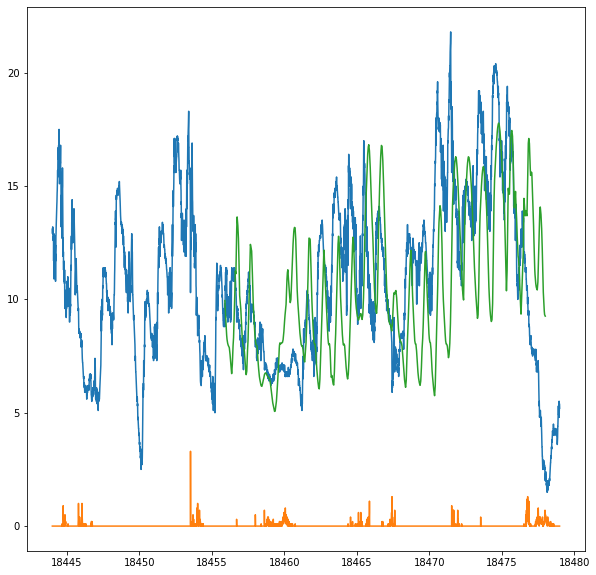

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(times_for_temp, temp)
ax.plot(times_for_temp, precip)
ax.plot(times_of_discharge, discharge)

In [7]:
temp_at_dis = np.interp(times_of_discharge, times_for_temp, temp)
precip_at_dis = np.interp(times_of_discharge, times_for_temp, precip)

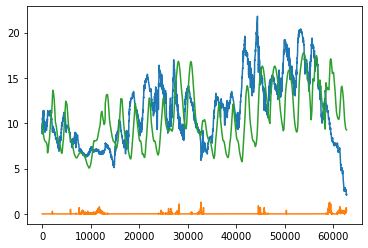

In [8]:
plt.plot(temp_at_dis)
plt.plot(precip_at_dis)
plt.plot(discharge)

In [9]:
d = {'Temperature':temp_at_dis, 'Precipitation':precip_at_dis, 'Discharge':discharge} #, 'Times':times_of_discharge}
df = pd.DataFrame(data = d)
df

,Temperature,Precipitation,Discharge
0,9.549167,0.0,9.947179
1,9.607500,0.0,9.934657
2,9.632500,0.0,9.929290
3,9.657500,0.0,9.923923
4,9.682500,0.0,9.918557
...,...,...,...
62740,2.133333,0.3,9.264333
62741,2.123333,0.3,9.263708
62742,2.113333,0.3,9.263083
62743,2.103333,0.3,9.262458


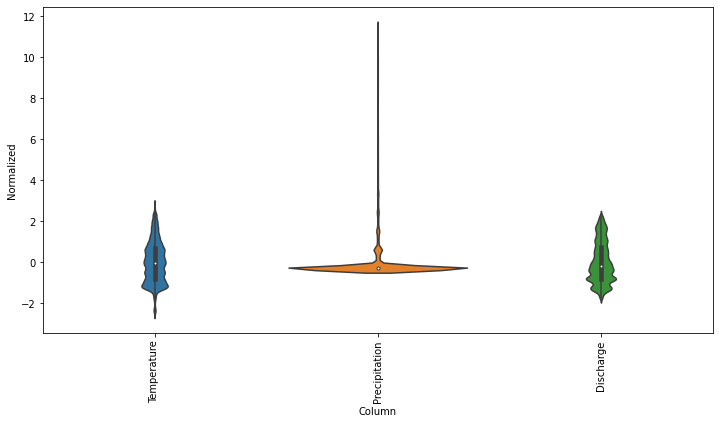

In [12]:
import seaborn as sns
train_mean = df.mean()
train_std = df.std()


df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [13]:
window = WindowGenerator(df,
                         input_width=200, 
                         label_width=1, 
                         shift=0, 
                         label_columns=['Discharge'], 
                         input_columns=['Temperature','Precipitation'])
window

Total window size: 200
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Label indices: [199]
Label column name(s): ['Discharge']

In [14]:
window_width = [200, 500, 800, 1200]
colors = ['Red', 'Orange', 'Green', 'Blue']

history = {}
val_performance = {}
performance = {}

In [15]:
for ww, c in zip(window_width, colors):
    
    lstm_model = tf.keras.models.Sequential([
        # Shape [batch, time, features] => [batch, time, lstm_units]
        tf.keras.layers.LSTM(32, return_sequences=True),
        # Shape => [batch, time, features]
        tf.keras.layers.Dense(units=1)
    ])
    
    linear_model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1)
    ])
    
    window = WindowGenerator(df,
                         input_width=ww, 
                         label_width=1, 
                         shift=0, 
                         label_columns=['Discharge'], 
                         input_columns=['Temperature','Precipitation'])
    
    history['LSTM_'+str(ww)] = compile_and_fit(lstm_model, window)
    history['Linear_'+str(ww)] = compile_and_fit(linear_model, window)

    val_performance['LSTM_'+str(ww)] = lstm_model.evaluate(window.val)
    val_performance['Linear_'+str(ww)] = linear_model.evaluate(window.val)
    
    performance['LSTM_'+str(ww)] = lstm_model.evaluate(window.test, verbose=0)
    performance['Linear'+str(ww)] = linear_model.evaluate(window.test, verbose=0)

Epoch 1/1000
7/7 [==============================] - 2s 86ms/step - loss: 0.9364 - mean_absolute_error: 0.7620 - val_loss: 2.7370 - val_mean_absolute_error: 1.4335
Epoch 2/1000
7/7 [==============================] - 0s 43ms/step - loss: 0.9051 - mean_absolute_error: 0.7463 - val_loss: 2.4425 - val_mean_absolute_error: 1.3579
Epoch 3/1000
7/7 [==============================] - 0s 44ms/step - loss: 0.8988 - mean_absolute_error: 0.7446 - val_loss: 2.3441 - val_mean_absolute_error: 1.3317
Epoch 4/1000
7/7 [==============================] - 0s 42ms/step - loss: 0.8979 - mean_absolute_error: 0.7461 - val_loss: 2.3555 - val_mean_absolute_error: 1.3342
Epoch 5/1000
7/7 [==============================] - 0s 43ms/step - loss: 0.8871 - mean_absolute_error: 0.7442 - val_loss: 2.3120 - val_mean_absolute_error: 1.3227
Epoch 6/1000
7/7 [==============================] - 0s 43ms/step - loss: 0.8826 - mean_absolute_error: 0.7424 - val_loss: 2.3832 - val_mean_absolute_error: 1.3407
Epoch 7/1000
7/7 [====

7/7 [==============================] - 0s 7ms/step - loss: 1.3738 - mean_absolute_error: 0.9344 - val_loss: 6.1456 - val_mean_absolute_error: 2.1916
Epoch 78/1000
7/7 [==============================] - 0s 7ms/step - loss: 1.3658 - mean_absolute_error: 0.9318 - val_loss: 6.0975 - val_mean_absolute_error: 2.1820
Epoch 79/1000
7/7 [==============================] - 0s 7ms/step - loss: 1.3580 - mean_absolute_error: 0.9292 - val_loss: 6.0522 - val_mean_absolute_error: 2.1729
Epoch 80/1000
7/7 [==============================] - 0s 7ms/step - loss: 1.3508 - mean_absolute_error: 0.9267 - val_loss: 6.0076 - val_mean_absolute_error: 2.1641
Epoch 81/1000
7/7 [==============================] - 0s 7ms/step - loss: 1.3433 - mean_absolute_error: 0.9243 - val_loss: 5.9651 - val_mean_absolute_error: 2.1556
Epoch 82/1000
7/7 [==============================] - 0s 7ms/step - loss: 1.3362 - mean_absolute_error: 0.9219 - val_loss: 5.9207 - val_mean_absolute_error: 2.1468
Epoch 83/1000
7/7 [=================

7/7 [==============================] - 0s 7ms/step - loss: 0.9604 - mean_absolute_error: 0.7795 - val_loss: 3.2748 - val_mean_absolute_error: 1.5657
Epoch 178/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9588 - mean_absolute_error: 0.7788 - val_loss: 3.2600 - val_mean_absolute_error: 1.5623
Epoch 179/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9573 - mean_absolute_error: 0.7780 - val_loss: 3.2431 - val_mean_absolute_error: 1.5584
Epoch 180/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9557 - mean_absolute_error: 0.7773 - val_loss: 3.2271 - val_mean_absolute_error: 1.5547
Epoch 181/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9541 - mean_absolute_error: 0.7765 - val_loss: 3.2145 - val_mean_absolute_error: 1.5518
Epoch 182/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9527 - mean_absolute_error: 0.7757 - val_loss: 3.1995 - val_mean_absolute_error: 1.5484
Epoch 183/1000
7/7 [===========

7/7 [==============================] - 0s 7ms/step - loss: 0.9104 - mean_absolute_error: 0.7542 - val_loss: 2.6826 - val_mean_absolute_error: 1.4221
Epoch 228/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9097 - mean_absolute_error: 0.7539 - val_loss: 2.6751 - val_mean_absolute_error: 1.4202
Epoch 229/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9094 - mean_absolute_error: 0.7538 - val_loss: 2.6649 - val_mean_absolute_error: 1.4176
Epoch 230/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9087 - mean_absolute_error: 0.7535 - val_loss: 2.6564 - val_mean_absolute_error: 1.4154
Epoch 231/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9082 - mean_absolute_error: 0.7534 - val_loss: 2.6473 - val_mean_absolute_error: 1.4131
Epoch 232/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.9078 - mean_absolute_error: 0.7531 - val_loss: 2.6405 - val_mean_absolute_error: 1.4114
Epoch 233/1000
7/7 [===========

7/7 [==============================] - 0s 7ms/step - loss: 0.8954 - mean_absolute_error: 0.7471 - val_loss: 2.3795 - val_mean_absolute_error: 1.3453
Epoch 278/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8952 - mean_absolute_error: 0.7469 - val_loss: 2.3761 - val_mean_absolute_error: 1.3444
Epoch 279/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8950 - mean_absolute_error: 0.7469 - val_loss: 2.3713 - val_mean_absolute_error: 1.3431
Epoch 280/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8949 - mean_absolute_error: 0.7468 - val_loss: 2.3672 - val_mean_absolute_error: 1.3420
Epoch 281/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8949 - mean_absolute_error: 0.7467 - val_loss: 2.3638 - val_mean_absolute_error: 1.3412
Epoch 282/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8946 - mean_absolute_error: 0.7467 - val_loss: 2.3586 - val_mean_absolute_error: 1.3398
Epoch 283/1000
7/7 [===========

7/7 [==============================] - 0s 7ms/step - loss: 0.8918 - mean_absolute_error: 0.7455 - val_loss: 2.2352 - val_mean_absolute_error: 1.3067
Epoch 328/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8918 - mean_absolute_error: 0.7455 - val_loss: 2.2338 - val_mean_absolute_error: 1.3063
Epoch 329/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8918 - mean_absolute_error: 0.7455 - val_loss: 2.2314 - val_mean_absolute_error: 1.3056
Epoch 330/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8917 - mean_absolute_error: 0.7454 - val_loss: 2.2298 - val_mean_absolute_error: 1.3052
Epoch 331/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8918 - mean_absolute_error: 0.7454 - val_loss: 2.2279 - val_mean_absolute_error: 1.3046
Epoch 332/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8917 - mean_absolute_error: 0.7454 - val_loss: 2.2261 - val_mean_absolute_error: 1.3042
Epoch 333/1000
7/7 [===========

7/7 [==============================] - 0s 7ms/step - loss: 0.8912 - mean_absolute_error: 0.7453 - val_loss: 2.1717 - val_mean_absolute_error: 1.2889
Epoch 378/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8912 - mean_absolute_error: 0.7454 - val_loss: 2.1699 - val_mean_absolute_error: 1.2884
Epoch 379/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8914 - mean_absolute_error: 0.7455 - val_loss: 2.1674 - val_mean_absolute_error: 1.2877
Epoch 380/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8912 - mean_absolute_error: 0.7454 - val_loss: 2.1684 - val_mean_absolute_error: 1.2879
Epoch 381/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8912 - mean_absolute_error: 0.7454 - val_loss: 2.1702 - val_mean_absolute_error: 1.2885
Epoch 382/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8912 - mean_absolute_error: 0.7453 - val_loss: 2.1711 - val_mean_absolute_error: 1.2887
Epoch 383/1000
7/7 [===========

Epoch 29/1000
3/3 [==============================] - 0s 20ms/step - loss: 3.3661 - mean_absolute_error: 1.2688 - val_loss: 10.8209 - val_mean_absolute_error: 3.0157
Epoch 30/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.3528 - mean_absolute_error: 1.2663 - val_loss: 10.7798 - val_mean_absolute_error: 3.0096
Epoch 31/1000
3/3 [==============================] - 0s 20ms/step - loss: 3.3383 - mean_absolute_error: 1.2639 - val_loss: 10.7388 - val_mean_absolute_error: 3.0036
Epoch 32/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.3241 - mean_absolute_error: 1.2615 - val_loss: 10.6965 - val_mean_absolute_error: 2.9973
Epoch 33/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.3101 - mean_absolute_error: 1.2591 - val_loss: 10.6554 - val_mean_absolute_error: 2.9912
Epoch 34/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.2982 - mean_absolute_error: 1.2569 - val_loss: 10.6137 - val_mean_absolute_error: 2.9850
Epoch 35/1

Epoch 79/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.7366 - mean_absolute_error: 1.1559 - val_loss: 8.8864 - val_mean_absolute_error: 2.7149
Epoch 80/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.7251 - mean_absolute_error: 1.1537 - val_loss: 8.8515 - val_mean_absolute_error: 2.7091
Epoch 81/1000
3/3 [==============================] - 0s 20ms/step - loss: 2.7141 - mean_absolute_error: 1.1517 - val_loss: 8.8160 - val_mean_absolute_error: 2.7033
Epoch 82/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.7024 - mean_absolute_error: 1.1496 - val_loss: 8.7818 - val_mean_absolute_error: 2.6976
Epoch 83/1000
3/3 [==============================] - 0s 20ms/step - loss: 2.6925 - mean_absolute_error: 1.1476 - val_loss: 8.7470 - val_mean_absolute_error: 2.6918
Epoch 84/1000
3/3 [==============================] - 0s 20ms/step - loss: 2.6806 - mean_absolute_error: 1.1455 - val_loss: 8.7130 - val_mean_absolute_error: 2.6861
Epoch 85/1000
3/

Epoch 129/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.2349 - mean_absolute_error: 1.0585 - val_loss: 7.2740 - val_mean_absolute_error: 2.4339
Epoch 130/1000
3/3 [==============================] - 0s 20ms/step - loss: 2.2263 - mean_absolute_error: 1.0567 - val_loss: 7.2451 - val_mean_absolute_error: 2.4286
Epoch 131/1000
3/3 [==============================] - 0s 20ms/step - loss: 2.2179 - mean_absolute_error: 1.0549 - val_loss: 7.2163 - val_mean_absolute_error: 2.4232
Epoch 132/1000
3/3 [==============================] - 0s 20ms/step - loss: 2.2091 - mean_absolute_error: 1.0530 - val_loss: 7.1881 - val_mean_absolute_error: 2.4180
Epoch 133/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.1999 - mean_absolute_error: 1.0512 - val_loss: 7.1607 - val_mean_absolute_error: 2.4129
Epoch 134/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.1922 - mean_absolute_error: 1.0495 - val_loss: 7.1321 - val_mean_absolute_error: 2.4075
Epoch 135/

Epoch 179/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.8447 - mean_absolute_error: 0.9779 - val_loss: 5.9674 - val_mean_absolute_error: 2.1781
Epoch 180/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.8378 - mean_absolute_error: 0.9766 - val_loss: 5.9448 - val_mean_absolute_error: 2.1734
Epoch 181/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.8315 - mean_absolute_error: 0.9753 - val_loss: 5.9214 - val_mean_absolute_error: 2.1685
Epoch 182/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.8246 - mean_absolute_error: 0.9739 - val_loss: 5.8987 - val_mean_absolute_error: 2.1638
Epoch 183/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.8187 - mean_absolute_error: 0.9726 - val_loss: 5.8755 - val_mean_absolute_error: 2.1589
Epoch 184/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.8115 - mean_absolute_error: 0.9712 - val_loss: 5.8521 - val_mean_absolute_error: 2.1540
Epoch 185/

Epoch 229/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.5460 - mean_absolute_error: 0.9147 - val_loss: 4.9066 - val_mean_absolute_error: 1.9439
Epoch 230/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.5400 - mean_absolute_error: 0.9134 - val_loss: 4.8886 - val_mean_absolute_error: 1.9397
Epoch 231/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.5349 - mean_absolute_error: 0.9123 - val_loss: 4.8711 - val_mean_absolute_error: 1.9356
Epoch 232/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.5304 - mean_absolute_error: 0.9112 - val_loss: 4.8536 - val_mean_absolute_error: 1.9315
Epoch 233/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.5251 - mean_absolute_error: 0.9100 - val_loss: 4.8351 - val_mean_absolute_error: 1.9271
Epoch 234/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.5199 - mean_absolute_error: 0.9088 - val_loss: 4.8170 - val_mean_absolute_error: 1.9228
Epoch 235/

Epoch 279/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.3200 - mean_absolute_error: 0.8604 - val_loss: 4.0976 - val_mean_absolute_error: 1.7450
Epoch 280/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.3158 - mean_absolute_error: 0.8593 - val_loss: 4.0830 - val_mean_absolute_error: 1.7413
Epoch 281/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.3118 - mean_absolute_error: 0.8583 - val_loss: 4.0678 - val_mean_absolute_error: 1.7375
Epoch 282/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.3086 - mean_absolute_error: 0.8576 - val_loss: 4.0527 - val_mean_absolute_error: 1.7337
Epoch 283/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.3045 - mean_absolute_error: 0.8565 - val_loss: 4.0388 - val_mean_absolute_error: 1.7302
Epoch 284/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.3008 - mean_absolute_error: 0.8555 - val_loss: 4.0251 - val_mean_absolute_error: 1.7268
Epoch 285/

Epoch 329/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.1563 - mean_absolute_error: 0.8165 - val_loss: 3.4559 - val_mean_absolute_error: 1.5903
Epoch 330/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.1536 - mean_absolute_error: 0.8158 - val_loss: 3.4447 - val_mean_absolute_error: 1.5876
Epoch 331/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.1508 - mean_absolute_error: 0.8151 - val_loss: 3.4339 - val_mean_absolute_error: 1.5850
Epoch 332/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.1482 - mean_absolute_error: 0.8145 - val_loss: 3.4221 - val_mean_absolute_error: 1.5821
Epoch 333/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.1451 - mean_absolute_error: 0.8136 - val_loss: 3.4106 - val_mean_absolute_error: 1.5794
Epoch 334/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.1428 - mean_absolute_error: 0.8131 - val_loss: 3.3992 - val_mean_absolute_error: 1.5766
Epoch 335/

Epoch 379/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.0399 - mean_absolute_error: 0.7862 - val_loss: 2.9602 - val_mean_absolute_error: 1.4698
Epoch 380/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.0380 - mean_absolute_error: 0.7857 - val_loss: 2.9513 - val_mean_absolute_error: 1.4675
Epoch 381/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.0361 - mean_absolute_error: 0.7852 - val_loss: 2.9436 - val_mean_absolute_error: 1.4656
Epoch 382/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.0340 - mean_absolute_error: 0.7845 - val_loss: 2.9351 - val_mean_absolute_error: 1.4635
Epoch 383/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.0324 - mean_absolute_error: 0.7841 - val_loss: 2.9258 - val_mean_absolute_error: 1.4611
Epoch 384/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.0305 - mean_absolute_error: 0.7836 - val_loss: 2.9177 - val_mean_absolute_error: 1.4591
Epoch 385/

Epoch 429/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9602 - mean_absolute_error: 0.7636 - val_loss: 2.5866 - val_mean_absolute_error: 1.3728
Epoch 430/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.9589 - mean_absolute_error: 0.7632 - val_loss: 2.5802 - val_mean_absolute_error: 1.3711
Epoch 431/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9575 - mean_absolute_error: 0.7628 - val_loss: 2.5733 - val_mean_absolute_error: 1.3693
Epoch 432/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9563 - mean_absolute_error: 0.7625 - val_loss: 2.5663 - val_mean_absolute_error: 1.3674
Epoch 433/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9549 - mean_absolute_error: 0.7621 - val_loss: 2.5599 - val_mean_absolute_error: 1.3657
Epoch 434/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9537 - mean_absolute_error: 0.7617 - val_loss: 2.5538 - val_mean_absolute_error: 1.3641
Epoch 435/

Epoch 479/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9079 - mean_absolute_error: 0.7481 - val_loss: 2.3114 - val_mean_absolute_error: 1.2993
Epoch 480/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9069 - mean_absolute_error: 0.7478 - val_loss: 2.3076 - val_mean_absolute_error: 1.2982
Epoch 481/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9062 - mean_absolute_error: 0.7476 - val_loss: 2.3031 - val_mean_absolute_error: 1.2970
Epoch 482/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9053 - mean_absolute_error: 0.7473 - val_loss: 2.2986 - val_mean_absolute_error: 1.2958
Epoch 483/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9046 - mean_absolute_error: 0.7471 - val_loss: 2.2946 - val_mean_absolute_error: 1.2947
Epoch 484/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9036 - mean_absolute_error: 0.7468 - val_loss: 2.2902 - val_mean_absolute_error: 1.2936
Epoch 485/

Epoch 529/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8750 - mean_absolute_error: 0.7378 - val_loss: 2.1179 - val_mean_absolute_error: 1.2467
Epoch 530/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8745 - mean_absolute_error: 0.7376 - val_loss: 2.1148 - val_mean_absolute_error: 1.2459
Epoch 531/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8740 - mean_absolute_error: 0.7375 - val_loss: 2.1112 - val_mean_absolute_error: 1.2449
Epoch 532/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8735 - mean_absolute_error: 0.7374 - val_loss: 2.1077 - val_mean_absolute_error: 1.2439
Epoch 533/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8730 - mean_absolute_error: 0.7372 - val_loss: 2.1041 - val_mean_absolute_error: 1.2429
Epoch 534/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8726 - mean_absolute_error: 0.7372 - val_loss: 2.1003 - val_mean_absolute_error: 1.2418
Epoch 535/

Epoch 579/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8548 - mean_absolute_error: 0.7315 - val_loss: 1.9714 - val_mean_absolute_error: 1.2053
Epoch 580/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8545 - mean_absolute_error: 0.7315 - val_loss: 1.9683 - val_mean_absolute_error: 1.2045
Epoch 581/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8542 - mean_absolute_error: 0.7314 - val_loss: 1.9656 - val_mean_absolute_error: 1.2037
Epoch 582/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8539 - mean_absolute_error: 0.7313 - val_loss: 1.9634 - val_mean_absolute_error: 1.2031
Epoch 583/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8536 - mean_absolute_error: 0.7312 - val_loss: 1.9611 - val_mean_absolute_error: 1.2024
Epoch 584/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8533 - mean_absolute_error: 0.7311 - val_loss: 1.9590 - val_mean_absolute_error: 1.2018
Epoch 585/

Epoch 629/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8433 - mean_absolute_error: 0.7275 - val_loss: 1.8730 - val_mean_absolute_error: 1.1769
Epoch 630/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8431 - mean_absolute_error: 0.7274 - val_loss: 1.8712 - val_mean_absolute_error: 1.1763
Epoch 631/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8429 - mean_absolute_error: 0.7274 - val_loss: 1.8696 - val_mean_absolute_error: 1.1759
Epoch 632/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8427 - mean_absolute_error: 0.7273 - val_loss: 1.8681 - val_mean_absolute_error: 1.1755
Epoch 633/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8427 - mean_absolute_error: 0.7273 - val_loss: 1.8661 - val_mean_absolute_error: 1.1749
Epoch 634/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8424 - mean_absolute_error: 0.7272 - val_loss: 1.8656 - val_mean_absolute_error: 1.1748
Epoch 635/

Epoch 679/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8368 - mean_absolute_error: 0.7248 - val_loss: 1.8042 - val_mean_absolute_error: 1.1575
Epoch 680/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.8367 - mean_absolute_error: 0.7248 - val_loss: 1.8030 - val_mean_absolute_error: 1.1571
Epoch 681/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8366 - mean_absolute_error: 0.7248 - val_loss: 1.8022 - val_mean_absolute_error: 1.1569
Epoch 682/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8365 - mean_absolute_error: 0.7247 - val_loss: 1.8016 - val_mean_absolute_error: 1.1568
Epoch 683/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8364 - mean_absolute_error: 0.7247 - val_loss: 1.8009 - val_mean_absolute_error: 1.1566
Epoch 684/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.8363 - mean_absolute_error: 0.7246 - val_loss: 1.8004 - val_mean_absolute_error: 1.1564
Epoch 685/

Epoch 729/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8333 - mean_absolute_error: 0.7233 - val_loss: 1.7611 - val_mean_absolute_error: 1.1456
Epoch 730/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8333 - mean_absolute_error: 0.7233 - val_loss: 1.7608 - val_mean_absolute_error: 1.1455
Epoch 731/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8332 - mean_absolute_error: 0.7233 - val_loss: 1.7599 - val_mean_absolute_error: 1.1453
Epoch 732/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8332 - mean_absolute_error: 0.7232 - val_loss: 1.7594 - val_mean_absolute_error: 1.1452
Epoch 733/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8332 - mean_absolute_error: 0.7232 - val_loss: 1.7584 - val_mean_absolute_error: 1.1449
Epoch 734/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8331 - mean_absolute_error: 0.7232 - val_loss: 1.7581 - val_mean_absolute_error: 1.1448
Epoch 735/

Epoch 779/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8316 - mean_absolute_error: 0.7224 - val_loss: 1.7397 - val_mean_absolute_error: 1.1400
Epoch 780/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8315 - mean_absolute_error: 0.7223 - val_loss: 1.7395 - val_mean_absolute_error: 1.1400
Epoch 781/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8315 - mean_absolute_error: 0.7223 - val_loss: 1.7393 - val_mean_absolute_error: 1.1399
Epoch 782/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8314 - mean_absolute_error: 0.7223 - val_loss: 1.7388 - val_mean_absolute_error: 1.1398
Epoch 783/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8314 - mean_absolute_error: 0.7222 - val_loss: 1.7386 - val_mean_absolute_error: 1.1397
Epoch 784/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8314 - mean_absolute_error: 0.7222 - val_loss: 1.7387 - val_mean_absolute_error: 1.1398
Epoch 785/

Epoch 33/1000
2/2 [==============================] - 0s 41ms/step - loss: 1.2560 - mean_absolute_error: 0.8740 - val_loss: 5.6464 - val_mean_absolute_error: 2.1564
Epoch 34/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.2526 - mean_absolute_error: 0.8728 - val_loss: 5.6275 - val_mean_absolute_error: 2.1525
Epoch 35/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.2493 - mean_absolute_error: 0.8715 - val_loss: 5.6095 - val_mean_absolute_error: 2.1488
Epoch 36/1000
2/2 [==============================] - 0s 41ms/step - loss: 1.2459 - mean_absolute_error: 0.8701 - val_loss: 5.5912 - val_mean_absolute_error: 2.1450
Epoch 37/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.2426 - mean_absolute_error: 0.8689 - val_loss: 5.5732 - val_mean_absolute_error: 2.1413
Epoch 38/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.2394 - mean_absolute_error: 0.8677 - val_loss: 5.5554 - val_mean_absolute_error: 2.1376
Epoch 39/1000
2/

Epoch 83/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.1125 - mean_absolute_error: 0.8167 - val_loss: 4.7959 - val_mean_absolute_error: 1.9731
Epoch 84/1000
2/2 [==============================] - 0s 41ms/step - loss: 1.1100 - mean_absolute_error: 0.8158 - val_loss: 4.7804 - val_mean_absolute_error: 1.9696
Epoch 85/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.1076 - mean_absolute_error: 0.8150 - val_loss: 4.7654 - val_mean_absolute_error: 1.9662
Epoch 86/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.1052 - mean_absolute_error: 0.8139 - val_loss: 4.7495 - val_mean_absolute_error: 1.9626
Epoch 87/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.1029 - mean_absolute_error: 0.8131 - val_loss: 4.7339 - val_mean_absolute_error: 1.9591
Epoch 88/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.1006 - mean_absolute_error: 0.8122 - val_loss: 4.7185 - val_mean_absolute_error: 1.9556
Epoch 89/1000
2/

Epoch 133/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.0133 - mean_absolute_error: 0.7802 - val_loss: 4.0878 - val_mean_absolute_error: 1.8057
Epoch 134/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.0116 - mean_absolute_error: 0.7796 - val_loss: 4.0762 - val_mean_absolute_error: 1.8028
Epoch 135/1000
2/2 [==============================] - 0s 42ms/step - loss: 1.0102 - mean_absolute_error: 0.7791 - val_loss: 4.0645 - val_mean_absolute_error: 1.7999
Epoch 136/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.0086 - mean_absolute_error: 0.7786 - val_loss: 4.0531 - val_mean_absolute_error: 1.7971
Epoch 137/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.0072 - mean_absolute_error: 0.7780 - val_loss: 4.0420 - val_mean_absolute_error: 1.7943
Epoch 138/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.0055 - mean_absolute_error: 0.7774 - val_loss: 4.0308 - val_mean_absolute_error: 1.7915
Epoch 139/

Epoch 183/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.9467 - mean_absolute_error: 0.7573 - val_loss: 3.5338 - val_mean_absolute_error: 1.6615
Epoch 184/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.9454 - mean_absolute_error: 0.7569 - val_loss: 3.5236 - val_mean_absolute_error: 1.6587
Epoch 185/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.9446 - mean_absolute_error: 0.7567 - val_loss: 3.5127 - val_mean_absolute_error: 1.6557
Epoch 186/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.9433 - mean_absolute_error: 0.7563 - val_loss: 3.5033 - val_mean_absolute_error: 1.6531
Epoch 187/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.9421 - mean_absolute_error: 0.7559 - val_loss: 3.4937 - val_mean_absolute_error: 1.6505
Epoch 188/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.9412 - mean_absolute_error: 0.7556 - val_loss: 3.4836 - val_mean_absolute_error: 1.6478
Epoch 189/

Epoch 233/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.8986 - mean_absolute_error: 0.7410 - val_loss: 3.0842 - val_mean_absolute_error: 1.5394
Epoch 234/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.8978 - mean_absolute_error: 0.7408 - val_loss: 3.0756 - val_mean_absolute_error: 1.5371
Epoch 235/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.8971 - mean_absolute_error: 0.7405 - val_loss: 3.0662 - val_mean_absolute_error: 1.5346
Epoch 236/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.8963 - mean_absolute_error: 0.7403 - val_loss: 3.0572 - val_mean_absolute_error: 1.5322
Epoch 237/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8955 - mean_absolute_error: 0.7401 - val_loss: 3.0486 - val_mean_absolute_error: 1.5300
Epoch 238/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8947 - mean_absolute_error: 0.7398 - val_loss: 3.0405 - val_mean_absolute_error: 1.5279
Epoch 239/

Epoch 283/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.8647 - mean_absolute_error: 0.7288 - val_loss: 2.7212 - val_mean_absolute_error: 1.4443
Epoch 284/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.8641 - mean_absolute_error: 0.7285 - val_loss: 2.7151 - val_mean_absolute_error: 1.4426
Epoch 285/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.8635 - mean_absolute_error: 0.7283 - val_loss: 2.7093 - val_mean_absolute_error: 1.4411
Epoch 286/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.8631 - mean_absolute_error: 0.7281 - val_loss: 2.7032 - val_mean_absolute_error: 1.4395
Epoch 287/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8624 - mean_absolute_error: 0.7278 - val_loss: 2.6973 - val_mean_absolute_error: 1.4379
Epoch 288/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8620 - mean_absolute_error: 0.7276 - val_loss: 2.6912 - val_mean_absolute_error: 1.4363
Epoch 289/

Epoch 333/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.8405 - mean_absolute_error: 0.7191 - val_loss: 2.4349 - val_mean_absolute_error: 1.3664
Epoch 334/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8402 - mean_absolute_error: 0.7190 - val_loss: 2.4296 - val_mean_absolute_error: 1.3650
Epoch 335/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.8398 - mean_absolute_error: 0.7188 - val_loss: 2.4250 - val_mean_absolute_error: 1.3636
Epoch 336/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.8393 - mean_absolute_error: 0.7187 - val_loss: 2.4202 - val_mean_absolute_error: 1.3623
Epoch 337/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.8389 - mean_absolute_error: 0.7185 - val_loss: 2.4158 - val_mean_absolute_error: 1.3611
Epoch 338/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8386 - mean_absolute_error: 0.7184 - val_loss: 2.4106 - val_mean_absolute_error: 1.3596
Epoch 339/

Epoch 383/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8226 - mean_absolute_error: 0.7113 - val_loss: 2.1969 - val_mean_absolute_error: 1.2976
Epoch 384/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.8223 - mean_absolute_error: 0.7111 - val_loss: 2.1923 - val_mean_absolute_error: 1.2962
Epoch 385/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.8220 - mean_absolute_error: 0.7110 - val_loss: 2.1881 - val_mean_absolute_error: 1.2949
Epoch 386/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8218 - mean_absolute_error: 0.7109 - val_loss: 2.1838 - val_mean_absolute_error: 1.2937
Epoch 387/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.8215 - mean_absolute_error: 0.7108 - val_loss: 2.1800 - val_mean_absolute_error: 1.2925
Epoch 388/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8213 - mean_absolute_error: 0.7106 - val_loss: 2.1759 - val_mean_absolute_error: 1.2913
Epoch 389/

Epoch 433/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.8098 - mean_absolute_error: 0.7041 - val_loss: 2.0056 - val_mean_absolute_error: 1.2385
Epoch 434/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.8096 - mean_absolute_error: 0.7040 - val_loss: 2.0019 - val_mean_absolute_error: 1.2374
Epoch 435/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.8093 - mean_absolute_error: 0.7039 - val_loss: 1.9983 - val_mean_absolute_error: 1.2363
Epoch 436/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.8092 - mean_absolute_error: 0.7038 - val_loss: 1.9943 - val_mean_absolute_error: 1.2350
Epoch 437/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.8089 - mean_absolute_error: 0.7037 - val_loss: 1.9908 - val_mean_absolute_error: 1.2339
Epoch 438/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8087 - mean_absolute_error: 0.7036 - val_loss: 1.9871 - val_mean_absolute_error: 1.2328
Epoch 439/

Epoch 483/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.8015 - mean_absolute_error: 0.6992 - val_loss: 1.8501 - val_mean_absolute_error: 1.1891
Epoch 484/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.8013 - mean_absolute_error: 0.6990 - val_loss: 1.8477 - val_mean_absolute_error: 1.1883
Epoch 485/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.8012 - mean_absolute_error: 0.6990 - val_loss: 1.8452 - val_mean_absolute_error: 1.1875
Epoch 486/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.8010 - mean_absolute_error: 0.6989 - val_loss: 1.8425 - val_mean_absolute_error: 1.1867
Epoch 487/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.8008 - mean_absolute_error: 0.6988 - val_loss: 1.8402 - val_mean_absolute_error: 1.1859
Epoch 488/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.8008 - mean_absolute_error: 0.6988 - val_loss: 1.8375 - val_mean_absolute_error: 1.1850
Epoch 489/

Epoch 533/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7960 - mean_absolute_error: 0.6951 - val_loss: 1.7461 - val_mean_absolute_error: 1.1549
Epoch 534/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.7960 - mean_absolute_error: 0.6950 - val_loss: 1.7447 - val_mean_absolute_error: 1.1544
Epoch 535/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.7958 - mean_absolute_error: 0.6950 - val_loss: 1.7429 - val_mean_absolute_error: 1.1538
Epoch 536/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.7958 - mean_absolute_error: 0.6950 - val_loss: 1.7406 - val_mean_absolute_error: 1.1531
Epoch 537/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7957 - mean_absolute_error: 0.6949 - val_loss: 1.7390 - val_mean_absolute_error: 1.1525
Epoch 538/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7957 - mean_absolute_error: 0.6949 - val_loss: 1.7368 - val_mean_absolute_error: 1.1518
Epoch 539/

Epoch 583/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.7927 - mean_absolute_error: 0.6932 - val_loss: 1.6584 - val_mean_absolute_error: 1.1254
Epoch 584/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.7927 - mean_absolute_error: 0.6932 - val_loss: 1.6571 - val_mean_absolute_error: 1.1249
Epoch 585/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.7926 - mean_absolute_error: 0.6931 - val_loss: 1.6555 - val_mean_absolute_error: 1.1244
Epoch 586/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7926 - mean_absolute_error: 0.6931 - val_loss: 1.6539 - val_mean_absolute_error: 1.1238
Epoch 587/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.7926 - mean_absolute_error: 0.6931 - val_loss: 1.6524 - val_mean_absolute_error: 1.1233
Epoch 588/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7925 - mean_absolute_error: 0.6931 - val_loss: 1.6509 - val_mean_absolute_error: 1.1228
Epoch 589/

Epoch 633/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7905 - mean_absolute_error: 0.6922 - val_loss: 1.5846 - val_mean_absolute_error: 1.1000
Epoch 634/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7905 - mean_absolute_error: 0.6922 - val_loss: 1.5837 - val_mean_absolute_error: 1.0997
Epoch 635/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.7904 - mean_absolute_error: 0.6922 - val_loss: 1.5826 - val_mean_absolute_error: 1.0993
Epoch 636/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7905 - mean_absolute_error: 0.6922 - val_loss: 1.5815 - val_mean_absolute_error: 1.0989
Epoch 637/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.7904 - mean_absolute_error: 0.6921 - val_loss: 1.5803 - val_mean_absolute_error: 1.0985
Epoch 638/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7904 - mean_absolute_error: 0.6921 - val_loss: 1.5787 - val_mean_absolute_error: 1.0980
Epoch 639/

Epoch 683/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.7891 - mean_absolute_error: 0.6916 - val_loss: 1.5250 - val_mean_absolute_error: 1.0790
Epoch 684/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7891 - mean_absolute_error: 0.6916 - val_loss: 1.5239 - val_mean_absolute_error: 1.0786
Epoch 685/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.7890 - mean_absolute_error: 0.6916 - val_loss: 1.5225 - val_mean_absolute_error: 1.0782
Epoch 686/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7890 - mean_absolute_error: 0.6916 - val_loss: 1.5214 - val_mean_absolute_error: 1.0777
Epoch 687/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.7891 - mean_absolute_error: 0.6916 - val_loss: 1.5199 - val_mean_absolute_error: 1.0772
Epoch 688/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.7890 - mean_absolute_error: 0.6916 - val_loss: 1.5190 - val_mean_absolute_error: 1.0769
Epoch 689/

Epoch 733/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7884 - mean_absolute_error: 0.6916 - val_loss: 1.4787 - val_mean_absolute_error: 1.0625
Epoch 734/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7884 - mean_absolute_error: 0.6916 - val_loss: 1.4778 - val_mean_absolute_error: 1.0622
Epoch 735/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.7883 - mean_absolute_error: 0.6916 - val_loss: 1.4776 - val_mean_absolute_error: 1.0621
Epoch 736/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7883 - mean_absolute_error: 0.6916 - val_loss: 1.4774 - val_mean_absolute_error: 1.0620
Epoch 737/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7883 - mean_absolute_error: 0.6916 - val_loss: 1.4773 - val_mean_absolute_error: 1.0620
Epoch 738/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7884 - mean_absolute_error: 0.6916 - val_loss: 1.4771 - val_mean_absolute_error: 1.0619
Epoch 739/

Epoch 783/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.7880 - mean_absolute_error: 0.6913 - val_loss: 1.4605 - val_mean_absolute_error: 1.0556
Epoch 784/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.7880 - mean_absolute_error: 0.6913 - val_loss: 1.4597 - val_mean_absolute_error: 1.0553
Epoch 785/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7880 - mean_absolute_error: 0.6913 - val_loss: 1.4591 - val_mean_absolute_error: 1.0551
Epoch 786/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.7880 - mean_absolute_error: 0.6913 - val_loss: 1.4580 - val_mean_absolute_error: 1.0547
Epoch 787/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7880 - mean_absolute_error: 0.6913 - val_loss: 1.4570 - val_mean_absolute_error: 1.0544
Epoch 788/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.7880 - mean_absolute_error: 0.6914 - val_loss: 1.4559 - val_mean_absolute_error: 1.0540
Epoch 789/

Epoch 833/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7878 - mean_absolute_error: 0.6912 - val_loss: 1.4407 - val_mean_absolute_error: 1.0481
Epoch 834/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7878 - mean_absolute_error: 0.6912 - val_loss: 1.4404 - val_mean_absolute_error: 1.0480
Epoch 835/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.7878 - mean_absolute_error: 0.6912 - val_loss: 1.4396 - val_mean_absolute_error: 1.0477
Epoch 836/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7878 - mean_absolute_error: 0.6912 - val_loss: 1.4393 - val_mean_absolute_error: 1.0476
Epoch 837/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.7878 - mean_absolute_error: 0.6912 - val_loss: 1.4390 - val_mean_absolute_error: 1.0475
Epoch 838/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7878 - mean_absolute_error: 0.6912 - val_loss: 1.4391 - val_mean_absolute_error: 1.0476
Epoch 839/

Epoch 883/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.7877 - mean_absolute_error: 0.6914 - val_loss: 1.4199 - val_mean_absolute_error: 1.0406
Epoch 884/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7877 - mean_absolute_error: 0.6914 - val_loss: 1.4195 - val_mean_absolute_error: 1.0405
Epoch 885/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7877 - mean_absolute_error: 0.6914 - val_loss: 1.4193 - val_mean_absolute_error: 1.0404
Epoch 886/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7877 - mean_absolute_error: 0.6914 - val_loss: 1.4188 - val_mean_absolute_error: 1.0402
Epoch 887/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.7877 - mean_absolute_error: 0.6914 - val_loss: 1.4179 - val_mean_absolute_error: 1.0399
Epoch 888/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7877 - mean_absolute_error: 0.6914 - val_loss: 1.4175 - val_mean_absolute_error: 1.0397
Epoch 889/

Epoch 34/1000
2/2 [==============================] - 0s 40ms/step - loss: 3.6003 - mean_absolute_error: 1.5373 - val_loss: 18.2561 - val_mean_absolute_error: 3.9489
Epoch 35/1000
2/2 [==============================] - 0s 40ms/step - loss: 3.5925 - mean_absolute_error: 1.5359 - val_loss: 18.2240 - val_mean_absolute_error: 3.9453
Epoch 36/1000
2/2 [==============================] - 0s 40ms/step - loss: 3.5844 - mean_absolute_error: 1.5345 - val_loss: 18.1906 - val_mean_absolute_error: 3.9416
Epoch 37/1000
2/2 [==============================] - 0s 40ms/step - loss: 3.5766 - mean_absolute_error: 1.5330 - val_loss: 18.1569 - val_mean_absolute_error: 3.9378
Epoch 38/1000
2/2 [==============================] - 0s 40ms/step - loss: 3.5681 - mean_absolute_error: 1.5314 - val_loss: 18.1205 - val_mean_absolute_error: 3.9337
Epoch 39/1000
2/2 [==============================] - 0s 40ms/step - loss: 3.5598 - mean_absolute_error: 1.5300 - val_loss: 18.0813 - val_mean_absolute_error: 3.9293
Epoch 40/1

Epoch 84/1000
2/2 [==============================] - 0s 40ms/step - loss: 3.1904 - mean_absolute_error: 1.4590 - val_loss: 16.4618 - val_mean_absolute_error: 3.7437
Epoch 85/1000
2/2 [==============================] - 0s 40ms/step - loss: 3.1833 - mean_absolute_error: 1.4575 - val_loss: 16.4339 - val_mean_absolute_error: 3.7405
Epoch 86/1000
2/2 [==============================] - 0s 39ms/step - loss: 3.1763 - mean_absolute_error: 1.4562 - val_loss: 16.4050 - val_mean_absolute_error: 3.7371
Epoch 87/1000
2/2 [==============================] - 0s 40ms/step - loss: 3.1698 - mean_absolute_error: 1.4548 - val_loss: 16.3759 - val_mean_absolute_error: 3.7337
Epoch 88/1000
2/2 [==============================] - 0s 42ms/step - loss: 3.1627 - mean_absolute_error: 1.4534 - val_loss: 16.3473 - val_mean_absolute_error: 3.7304
Epoch 89/1000
2/2 [==============================] - 0s 40ms/step - loss: 3.1558 - mean_absolute_error: 1.4519 - val_loss: 16.3185 - val_mean_absolute_error: 3.7270
Epoch 90/1

2/2 [==============================] - 0s 40ms/step - loss: 2.5443 - mean_absolute_error: 1.3183 - val_loss: 13.6325 - val_mean_absolute_error: 3.3990
Epoch 183/1000
2/2 [==============================] - 0s 40ms/step - loss: 2.5378 - mean_absolute_error: 1.3169 - val_loss: 13.6002 - val_mean_absolute_error: 3.3948
Epoch 184/1000
2/2 [==============================] - 0s 38ms/step - loss: 2.5322 - mean_absolute_error: 1.3156 - val_loss: 13.5655 - val_mean_absolute_error: 3.3903
Epoch 185/1000
2/2 [==============================] - 0s 40ms/step - loss: 2.5259 - mean_absolute_error: 1.3143 - val_loss: 13.5328 - val_mean_absolute_error: 3.3860
Epoch 186/1000
2/2 [==============================] - 0s 38ms/step - loss: 2.5196 - mean_absolute_error: 1.3128 - val_loss: 13.5030 - val_mean_absolute_error: 3.3822
Epoch 187/1000
2/2 [==============================] - 0s 40ms/step - loss: 2.5137 - mean_absolute_error: 1.3115 - val_loss: 13.4744 - val_mean_absolute_error: 3.3785
Epoch 188/1000
2/2 

2/2 [==============================] - 0s 40ms/step - loss: 2.0595 - mean_absolute_error: 1.1965 - val_loss: 11.2808 - val_mean_absolute_error: 3.0847
Epoch 281/1000
2/2 [==============================] - 0s 40ms/step - loss: 2.0556 - mean_absolute_error: 1.1954 - val_loss: 11.2634 - val_mean_absolute_error: 3.0823
Epoch 282/1000
2/2 [==============================] - 0s 40ms/step - loss: 2.0518 - mean_absolute_error: 1.1943 - val_loss: 11.2461 - val_mean_absolute_error: 3.0799
Epoch 283/1000
2/2 [==============================] - 0s 41ms/step - loss: 2.0484 - mean_absolute_error: 1.1933 - val_loss: 11.2280 - val_mean_absolute_error: 3.0774
Epoch 284/1000
2/2 [==============================] - 0s 40ms/step - loss: 2.0446 - mean_absolute_error: 1.1923 - val_loss: 11.2081 - val_mean_absolute_error: 3.0745
Epoch 285/1000
2/2 [==============================] - 0s 38ms/step - loss: 2.0412 - mean_absolute_error: 1.1913 - val_loss: 11.1859 - val_mean_absolute_error: 3.0714
Epoch 286/1000
2/2 

Epoch 379/1000
2/2 [==============================] - 0s 41ms/step - loss: 1.7220 - mean_absolute_error: 1.0993 - val_loss: 9.3696 - val_mean_absolute_error: 2.8006
Epoch 380/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.7189 - mean_absolute_error: 1.0983 - val_loss: 9.3562 - val_mean_absolute_error: 2.7986
Epoch 381/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.7161 - mean_absolute_error: 1.0973 - val_loss: 9.3429 - val_mean_absolute_error: 2.7966
Epoch 382/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.7129 - mean_absolute_error: 1.0963 - val_loss: 9.3278 - val_mean_absolute_error: 2.7943
Epoch 383/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.7099 - mean_absolute_error: 1.0953 - val_loss: 9.3107 - val_mean_absolute_error: 2.7917
Epoch 384/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.7070 - mean_absolute_error: 1.0944 - val_loss: 9.2936 - val_mean_absolute_error: 2.7891
Epoch 385/

Epoch 429/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.5785 - mean_absolute_error: 1.0535 - val_loss: 8.4940 - val_mean_absolute_error: 2.6602
Epoch 430/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.5756 - mean_absolute_error: 1.0525 - val_loss: 8.4774 - val_mean_absolute_error: 2.6575
Epoch 431/1000
2/2 [==============================] - 0s 41ms/step - loss: 1.5728 - mean_absolute_error: 1.0516 - val_loss: 8.4609 - val_mean_absolute_error: 2.6547
Epoch 432/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.5703 - mean_absolute_error: 1.0508 - val_loss: 8.4442 - val_mean_absolute_error: 2.6520
Epoch 433/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.5677 - mean_absolute_error: 1.0499 - val_loss: 8.4266 - val_mean_absolute_error: 2.6490
Epoch 434/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.5654 - mean_absolute_error: 1.0492 - val_loss: 8.4083 - val_mean_absolute_error: 2.6460
Epoch 435/

Epoch 479/1000
2/2 [==============================] - 0s 36ms/step - loss: 1.4643 - mean_absolute_error: 1.0139 - val_loss: 7.7764 - val_mean_absolute_error: 2.5399
Epoch 480/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.4622 - mean_absolute_error: 1.0132 - val_loss: 7.7612 - val_mean_absolute_error: 2.5372
Epoch 481/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.4600 - mean_absolute_error: 1.0124 - val_loss: 7.7470 - val_mean_absolute_error: 2.5348
Epoch 482/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.4579 - mean_absolute_error: 1.0117 - val_loss: 7.7332 - val_mean_absolute_error: 2.5324
Epoch 483/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.4560 - mean_absolute_error: 1.0110 - val_loss: 7.7194 - val_mean_absolute_error: 2.5299
Epoch 484/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.4541 - mean_absolute_error: 1.0104 - val_loss: 7.7061 - val_mean_absolute_error: 2.5276
Epoch 485/

Epoch 529/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.3606 - mean_absolute_error: 0.9747 - val_loss: 7.0897 - val_mean_absolute_error: 2.4188
Epoch 530/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.3587 - mean_absolute_error: 0.9740 - val_loss: 7.0766 - val_mean_absolute_error: 2.4164
Epoch 531/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.3567 - mean_absolute_error: 0.9731 - val_loss: 7.0643 - val_mean_absolute_error: 2.4142
Epoch 532/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.3550 - mean_absolute_error: 0.9725 - val_loss: 7.0527 - val_mean_absolute_error: 2.4121
Epoch 533/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.3532 - mean_absolute_error: 0.9718 - val_loss: 7.0420 - val_mean_absolute_error: 2.4101
Epoch 534/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.3515 - mean_absolute_error: 0.9711 - val_loss: 7.0322 - val_mean_absolute_error: 2.4084
Epoch 535/

Epoch 579/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.2791 - mean_absolute_error: 0.9417 - val_loss: 6.5092 - val_mean_absolute_error: 2.3108
Epoch 580/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.2777 - mean_absolute_error: 0.9411 - val_loss: 6.4985 - val_mean_absolute_error: 2.3087
Epoch 581/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.2764 - mean_absolute_error: 0.9406 - val_loss: 6.4874 - val_mean_absolute_error: 2.3066
Epoch 582/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.2749 - mean_absolute_error: 0.9401 - val_loss: 6.4763 - val_mean_absolute_error: 2.3045
Epoch 583/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.2735 - mean_absolute_error: 0.9394 - val_loss: 6.4655 - val_mean_absolute_error: 2.3024
Epoch 584/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.2721 - mean_absolute_error: 0.9388 - val_loss: 6.4553 - val_mean_absolute_error: 2.3005
Epoch 585/

Epoch 629/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.2110 - mean_absolute_error: 0.9124 - val_loss: 5.9942 - val_mean_absolute_error: 2.2102
Epoch 630/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.2096 - mean_absolute_error: 0.9119 - val_loss: 5.9839 - val_mean_absolute_error: 2.2082
Epoch 631/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.2083 - mean_absolute_error: 0.9113 - val_loss: 5.9735 - val_mean_absolute_error: 2.2061
Epoch 632/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.2069 - mean_absolute_error: 0.9106 - val_loss: 5.9642 - val_mean_absolute_error: 2.2043
Epoch 633/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.2055 - mean_absolute_error: 0.9100 - val_loss: 5.9547 - val_mean_absolute_error: 2.2024
Epoch 634/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.2042 - mean_absolute_error: 0.9094 - val_loss: 5.9455 - val_mean_absolute_error: 2.2006
Epoch 635/

Epoch 679/1000
2/2 [==============================] - 0s 36ms/step - loss: 1.1530 - mean_absolute_error: 0.8887 - val_loss: 5.4836 - val_mean_absolute_error: 2.1039
Epoch 680/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.1519 - mean_absolute_error: 0.8882 - val_loss: 5.4713 - val_mean_absolute_error: 2.1013
Epoch 681/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.1506 - mean_absolute_error: 0.8878 - val_loss: 5.4596 - val_mean_absolute_error: 2.0987
Epoch 682/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.1494 - mean_absolute_error: 0.8873 - val_loss: 5.4492 - val_mean_absolute_error: 2.0965
Epoch 683/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.1482 - mean_absolute_error: 0.8868 - val_loss: 5.4391 - val_mean_absolute_error: 2.0944
Epoch 684/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.1471 - mean_absolute_error: 0.8864 - val_loss: 5.4284 - val_mean_absolute_error: 2.0921
Epoch 685/

Epoch 729/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.1002 - mean_absolute_error: 0.8666 - val_loss: 5.0261 - val_mean_absolute_error: 2.0046
Epoch 730/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.0989 - mean_absolute_error: 0.8661 - val_loss: 5.0148 - val_mean_absolute_error: 2.0020
Epoch 731/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.0977 - mean_absolute_error: 0.8657 - val_loss: 5.0029 - val_mean_absolute_error: 1.9993
Epoch 732/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.0965 - mean_absolute_error: 0.8653 - val_loss: 4.9900 - val_mean_absolute_error: 1.9964
Epoch 733/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.0955 - mean_absolute_error: 0.8650 - val_loss: 4.9779 - val_mean_absolute_error: 1.9936
Epoch 734/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.0943 - mean_absolute_error: 0.8646 - val_loss: 4.9675 - val_mean_absolute_error: 1.9912
Epoch 735/

Epoch 779/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.0561 - mean_absolute_error: 0.8524 - val_loss: 4.6047 - val_mean_absolute_error: 1.9076
Epoch 780/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.0552 - mean_absolute_error: 0.8522 - val_loss: 4.5954 - val_mean_absolute_error: 1.9054
Epoch 781/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.0545 - mean_absolute_error: 0.8521 - val_loss: 4.5865 - val_mean_absolute_error: 1.9033
Epoch 782/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.0536 - mean_absolute_error: 0.8519 - val_loss: 4.5778 - val_mean_absolute_error: 1.9012
Epoch 783/1000
2/2 [==============================] - 0s 40ms/step - loss: 1.0529 - mean_absolute_error: 0.8518 - val_loss: 4.5690 - val_mean_absolute_error: 1.8991
Epoch 784/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.0521 - mean_absolute_error: 0.8516 - val_loss: 4.5614 - val_mean_absolute_error: 1.8973
Epoch 785/

Epoch 829/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.0194 - mean_absolute_error: 0.8429 - val_loss: 4.2381 - val_mean_absolute_error: 1.8277
Epoch 830/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.0187 - mean_absolute_error: 0.8427 - val_loss: 4.2308 - val_mean_absolute_error: 1.8262
Epoch 831/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.0179 - mean_absolute_error: 0.8424 - val_loss: 4.2237 - val_mean_absolute_error: 1.8247
Epoch 832/1000
2/2 [==============================] - 0s 39ms/step - loss: 1.0172 - mean_absolute_error: 0.8423 - val_loss: 4.2169 - val_mean_absolute_error: 1.8233
Epoch 833/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.0163 - mean_absolute_error: 0.8420 - val_loss: 4.2097 - val_mean_absolute_error: 1.8218
Epoch 834/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.0157 - mean_absolute_error: 0.8418 - val_loss: 4.2019 - val_mean_absolute_error: 1.8202
Epoch 835/

Epoch 879/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.9866 - mean_absolute_error: 0.8335 - val_loss: 3.9072 - val_mean_absolute_error: 1.7572
Epoch 880/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.9860 - mean_absolute_error: 0.8333 - val_loss: 3.9032 - val_mean_absolute_error: 1.7563
Epoch 881/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.9855 - mean_absolute_error: 0.8331 - val_loss: 3.8991 - val_mean_absolute_error: 1.7554
Epoch 882/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.9850 - mean_absolute_error: 0.8329 - val_loss: 3.8940 - val_mean_absolute_error: 1.7543
Epoch 883/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.9845 - mean_absolute_error: 0.8327 - val_loss: 3.8884 - val_mean_absolute_error: 1.7531
Epoch 884/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.9839 - mean_absolute_error: 0.8325 - val_loss: 3.8834 - val_mean_absolute_error: 1.7520
Epoch 885/

Epoch 929/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.9611 - mean_absolute_error: 0.8260 - val_loss: 3.6274 - val_mean_absolute_error: 1.6944
Epoch 930/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.9607 - mean_absolute_error: 0.8259 - val_loss: 3.6230 - val_mean_absolute_error: 1.6934
Epoch 931/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.9603 - mean_absolute_error: 0.8258 - val_loss: 3.6186 - val_mean_absolute_error: 1.6924
Epoch 932/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.9600 - mean_absolute_error: 0.8257 - val_loss: 3.6142 - val_mean_absolute_error: 1.6913
Epoch 933/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.9595 - mean_absolute_error: 0.8255 - val_loss: 3.6105 - val_mean_absolute_error: 1.6905
Epoch 934/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.9591 - mean_absolute_error: 0.8253 - val_loss: 3.6068 - val_mean_absolute_error: 1.6896
Epoch 935/

Epoch 979/1000
2/2 [==============================] - 0s 37ms/step - loss: 0.9410 - mean_absolute_error: 0.8193 - val_loss: 3.3966 - val_mean_absolute_error: 1.6403
Epoch 980/1000
2/2 [==============================] - 0s 40ms/step - loss: 0.9407 - mean_absolute_error: 0.8193 - val_loss: 3.3908 - val_mean_absolute_error: 1.6389
Epoch 981/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.9402 - mean_absolute_error: 0.8192 - val_loss: 3.3845 - val_mean_absolute_error: 1.6374
Epoch 982/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.9399 - mean_absolute_error: 0.8191 - val_loss: 3.3780 - val_mean_absolute_error: 1.6359
Epoch 983/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.9395 - mean_absolute_error: 0.8191 - val_loss: 3.3722 - val_mean_absolute_error: 1.6345
Epoch 984/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.9391 - mean_absolute_error: 0.8191 - val_loss: 3.3670 - val_mean_absolute_error: 1.6333
Epoch 985/

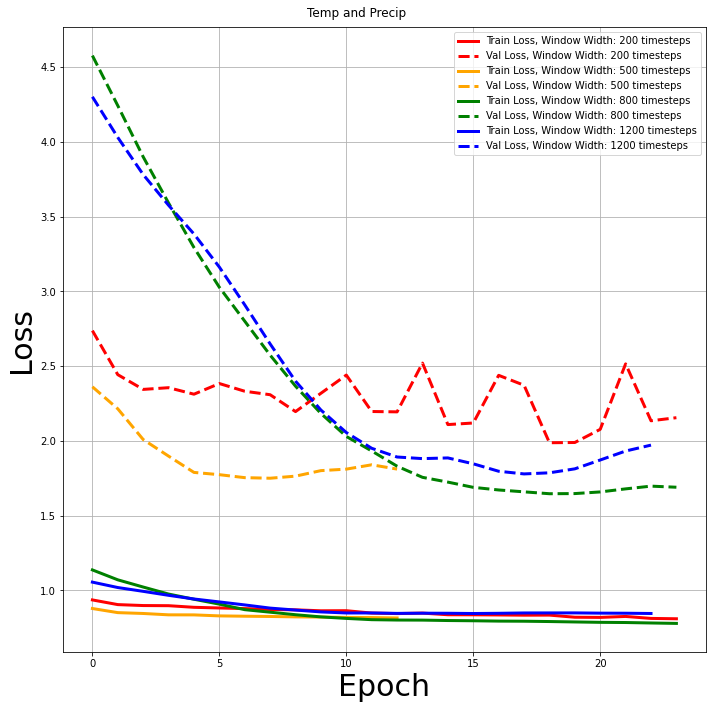

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')

for ww, c in zip(window_width, colors):
    

    ax.plot(history['LSTM_'+str(ww)].history['loss'], label='Train Loss, Window Width: '+str(ww)+' timesteps',linewidth=3, c=c)
    ax.plot(history['LSTM_'+str(ww)].history['val_loss'], label='Val Loss, Window Width: '+str(ww)+' timesteps',linewidth=3, ls='--', c=c)

#     ax.plot(history['Linear_'+str(ww)].history['loss'], label='Train Loss, Window Width: '+str(ww)+' timesteps',linewidth=3, c=c)
#     ax.plot(history['Linear_'+str(ww)].history['val_loss'], label='Val Loss, Window Width: '+str(ww)+' timesteps',linewidth=3, ls='--', c=c)

ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
#ax.set_ylim((0, 1))
ax.grid()
ax.legend()
fig.suptitle('Temp and Precip')

plt.tight_layout()
plt.show()

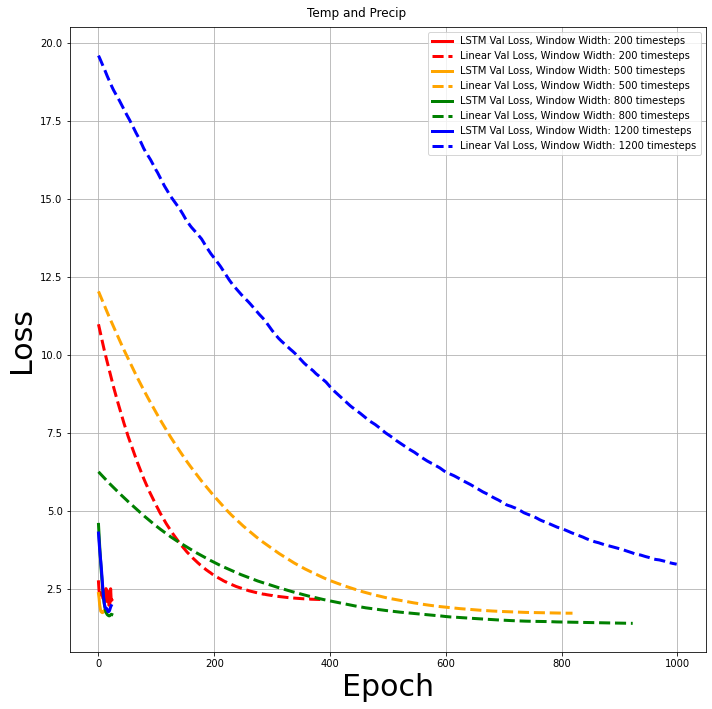

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')

for ww, c in zip(window_width, colors):
    

    ax.plot(history['LSTM_'+str(ww)].history['val_loss'], label='LSTM Val Loss, Window Width: '+str(ww)+' timesteps',linewidth=3, c=c)
    ax.plot(history['Linear_'+str(ww)].history['val_loss'], label='Linear Val Loss, Window Width: '+str(ww)+' timesteps',linewidth=3, ls='--', c=c)

ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
#ax.set_ylim((0, .001))
ax.grid()
ax.legend()
fig.suptitle('Temp and Precip')

plt.tight_layout()
plt.show()

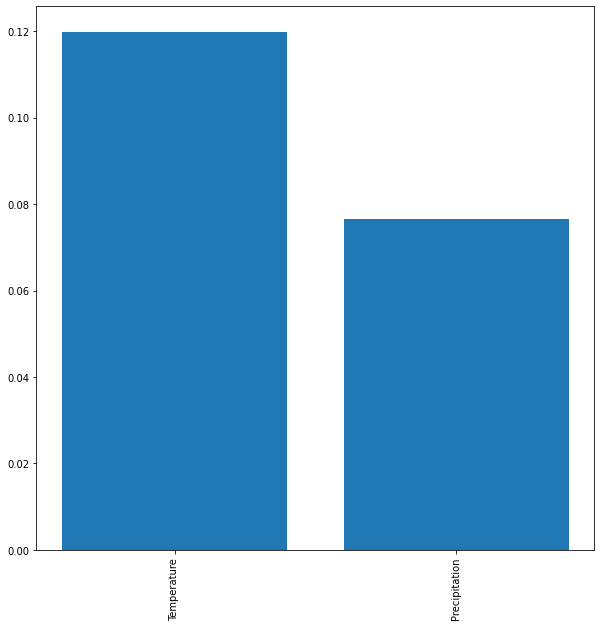

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')

plt.bar(x = range(len(window.train_df.columns)-1),
        height=linear_model.layers[0].kernel[:,0].numpy())
axis = plt.gca()
ax.set_xticks(range(len(window.train_df.columns)-1))
_ = ax.set_xticklabels(['Temperature','Precipitation'], rotation=90)

In [ ]:
window.example[1]

In [ ]:
len(window.train_df.columns)-1

# Direct cmoparison of Temp/Precip model and DAS model

In [19]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d_tp
import importlib
importlib.reload(d2d_tp)
import pandas as pd
import os
import h5py

import matplotlib.pyplot as plt
import matplotlib

In [24]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 2000
bs = 2

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

d = {'Temperature':temp_at_dis, 'Precipitation':precip_at_dis, 'Discharge':discharge} #, 'Times':times_of_discharge}
df_tp = pd.DataFrame(data = d)



linear_model_DAS, lstm_model_DAS, dnn_model_DAS, df_all_chan, input_columns_DAS, das_data_all, f  = d2d_tp.import_data(filename = file)

#Model definition for temp/precip model
lstm_model_tp = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

linear_model_tp = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


ValueError: too many values to unpack (expected 7)

In [21]:
window_DAS = d2d.WindowGenerator(df_all_chan,
                                input_width=ww,
                                label_width=1, 
                                shift=0,
                                label_columns=['Discharge'],
                                input_columns=input_columns,
                                shuffle=True,
                                batch_size=bs)

window_tp = WindowGenerator(df_tp,
                           input_width=ww, 
                           label_width=1, 
                           shift=0, 
                           label_columns=['Discharge'], 
                           input_columns=['Temperature','Precipitation'],
                           batch_size = bs)

NameError: name 'input_columns' is not defined

In [22]:
history['LSTM_DAS_ww'+str(ww)] = compile_and_fit(lstm_model_DAS, window_DAS)
history['LSTM_TP_ww'+str(ww)] = compile_and_fit(lstm_model_tp, window_tp)
history['Linear_DAS_ww'+str(ww)] = compile_and_fit(linear_model_DAS, window_DAS)
history['Linear_TP_ww'+str(ww)] = compile_and_fit(linear_model_tp, window_tp)

val_performance['LSTM_DAS_ww'+str(ww)] = lstm_model_DAS.evaluate(window_DAS.val)
val_performance['LSTM_TP_ww'+str(ww)] = lstm_model_tp.evaluate(window_tp.val)
val_performance['Linear_DAS_ww'+str(ww)] = linear_model_DAS.evaluate(window_DAS.val)
val_performance['Linear_TP_ww'+str(ww)] = linear_model_tp.evaluate(window_tp.val)

performance['LSTM_DAS_ww'+str(ww)] = lstm_model_DAS.evaluate(window_DAS.test, verbose=0)
performance['LSTM_TP_ww'+str(ww)] = lstm_model_tp.evaluate(window_tp.test, verbose=0)
performance['Linear_DAS_ww'+str(ww)] = linear_model_DAS.evaluate(window_DAS.test, verbose=0)
performance['Linear_TP_ww'+str(ww)] = linear_model_tp.evaluate(window_tp.test, verbose=0)

NameError: name 'window_DAS' is not defined

KeyError: 'LSTM_DAS_ww2000'

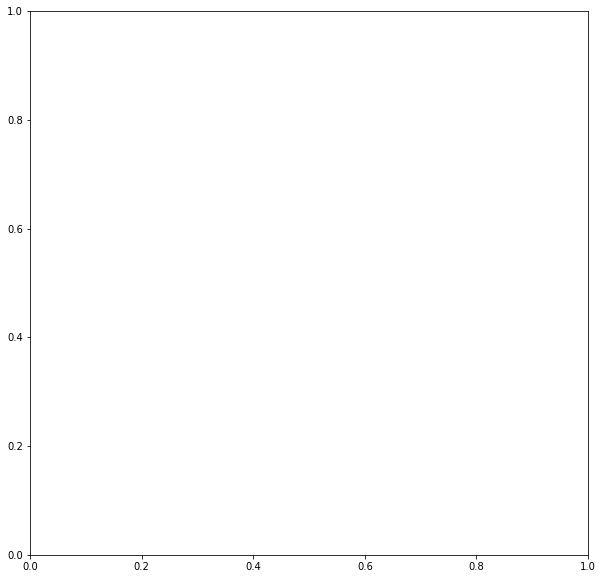

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')


ax.plot(history['LSTM_DAS_ww'+str(ww)].history['loss'], label='LSTM DAS, Train Loss',linewidth=3, c='b')
ax.plot(history['LSTM_DAS_ww'+str(ww)].history['val_loss'], label='LSTM DAS, Val Loss',linewidth=3, ls='--', c='b')

ax.plot(history['LSTM_TP_ww'+str(ww)].history['loss'], label='LSTM Temp/Precip, Train Loss',linewidth=3, c='r')
ax.plot(history['LSTM_TP_ww'+str(ww)].history['val_loss'], label='LSTM Temp/Precip, Val Loss',linewidth=3, ls='--', c='r')

ax.plot(history['Linear_DAS_ww'+str(ww)].history['loss'], label='Linear DAS, Train Loss',linewidth=3, c='g')
ax.plot(history['Linear_DAS_ww'+str(ww)].history['val_loss'], label='Linear DAS, Val Loss',linewidth=3, ls='--', c='g')

ax.plot(history['Linear_TP_ww'+str(ww)].history['loss'], label='Linear Temp/Precip, Train Loss',linewidth=3, c='orange')
ax.plot(history['Linear_TP_ww'+str(ww)].history['val_loss'], label='Linear Temp/Precip, Val Loss',linewidth=3, ls='--', c='orange')

ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
ax.set_ylim((0, 10))
ax.grid()
ax.legend()
fig.suptitle('DAS and Temp/Precip Comparison')

plt.tight_layout()
plt.show()

In [ ]:
n = 8
y = window_tp.example[0][n]

plt.plot(y)
plt.plot(y.shape[0], window_tp.example[1][n], markersize = 10, marker = 'o')

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')

plt.bar(x = range(len(window_tp.train_df.columns)-1),
        height=linear_model_tp.layers[0].kernel[:,0].numpy())
axis = plt.gca()
ax.set_xticks(range(len(window_tp.train_df.columns)-1))
_ = ax.set_xticklabels(['Temperature','Precipitation'], rotation=90)

# Testing new D2D_TP with temp/precip added

In [3]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d_tp
import d2d
import importlib
importlib.reload(d2d_tp)
importlib.reload(d2d)
import pandas as pd
import os
import h5py

import matplotlib.pyplot as plt
import matplotlib

In [4]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

pred_DAS = {}
pred_TP = {}

true_DAS = {}
true_TP = {}

residuals_DAS = {}
residuals_TP = {}

seeds = np.arange(0, 25, 1)

for SEED in seeds:

    ww = 200
    bs = 32

    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)



    linear_model_DAS, linear_model_tp, lstm_model_DAS, lstm_model_tp, dnn_model_DAS, df_all_chan, input_columns_DAS, input_columns_tp, das_data_all, f  = d2d_tp.import_data(filename = file)
    
    windows = d2d_tp.WindowGenerator(df_all_chan,
                             input_width=ww,
                             label_width=1, 
                             shift=0,
                             label_columns=['Discharge'],
                             input_columns_DAS=input_columns_DAS,
                             input_columns_tp=input_columns_tp,
                             shuffle=True,
                             batch_size=bs)
    history['LSTM_DAS_'+str(SEED)] = d2d_tp.compile_and_fit_das(lstm_model_DAS, windows)
    history['LSTM_TP_'+str(SEED)] = d2d_tp.compile_and_fit_tp(lstm_model_tp, windows)

    val_performance['LSTM_DAS_'+str(SEED)] = lstm_model_DAS.evaluate(windows.val)
    val_performance['LSTM_TP_'+str(SEED)] = lstm_model_tp.evaluate(windows.val_tp)

    performance['LSTM_DAS_'+str(SEED)] = lstm_model_DAS.evaluate(windows.test, verbose=0)
    performance['LSTM_TP_'+str(SEED)] = lstm_model_tp.evaluate(windows.test_tp, verbose=0)
    
    #Residuals

    ###DAS

    predictions_DAS = lstm_model_DAS.predict(windows.test, verbose = 0).squeeze()

    pred_test_dis_DAS = []

    for i in predictions_DAS:
        #x = (i[-1]*windows.dis_std) + windows.dis_mean #Return_sequences = True
        x = (i*windows.dis_std) + windows.dis_mean
        pred_test_dis_DAS.append(x)
    
    true_dis_DAS = []

    for i in windows.test.as_numpy_iterator():
        true_dis_DAS.append(i[1])

    true_dis_DAS = np.asarray(true_dis_DAS).squeeze()
    true_dis_DAS = (true_dis_DAS*windows.dis_std)+windows.dis_mean

    #true_dis_DAS = true_dis_DAS.reshape(true_dis_DAS.shape[0]*true_dis_DAS.shape[1])

    residual_DAS = pred_test_dis_DAS - true_dis_DAS

    pred_DAS['LSTM_DAS_'+str(SEED)] = pred_test_dis_DAS
    true_DAS['LSTM_DAS_'+str(SEED)] = true_dis_DAS
    residuals_DAS['LSTM_DAS_'+str(SEED)] = residual_DAS
    
    #Residuals

    ###Temp and Precip

    predictions_tp = lstm_model_tp.predict(windows.test_tp).squeeze()

    pred_test_dis_tp = []

    for i in predictions_tp:
        x = (i*windows.dis_std_tp) + windows.dis_mean_tp  #return_sequences = True
        #x = (i*windows.dis_std_tp) + windows.dis_mean_tp  #return_sequences = False
        pred_test_dis_tp.append(x)

    true_dis_tp = []

    for i in windows.test_tp.as_numpy_iterator():
        true_dis_tp.append(i[1])

    true_dis_tp = np.asarray(true_dis_tp).squeeze()
    true_dis_tp = (true_dis_tp*windows.dis_std_tp)+windows.dis_mean_tp

    #true_dis_tp = true_dis_tp.reshape(true_dis_tp.shape[0]*true_dis_tp.shape[1])

    residual_tp = pred_test_dis_tp - true_dis_tp
    
    pred_TP['LSTM_TP_'+str(SEED)] = pred_test_dis_tp
    true_TP['LSTM_TP_'+str(SEED)] = true_dis_tp
    residuals_TP['LSTM_TP_'+str(SEED)] = residual_tp

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 223ms/step - loss: 0.8842 - mean_absolute_error: 0.7757 - val_loss: 0.4469 - val_mean_absolute_error: 0.5254
Epoch 2/1000
7/7 [==============================] - 1s 182ms/step - loss: 0.5538 - mean_absolute_error: 0.5516 - val_loss: 0.5404 - val_mean_absolute_error: 0.6103
Epoch 3/1000
7/7 [==============================] - 1s 179ms/step - loss: 0.3882 - mean_absolute_error: 0.4912 - val_loss: 0.4451 - val_mean_absolute_error: 0.5200
Epoch 4/1000
7/7 [==============================] - 1s 186ms/step - loss: 0.3321 - mean_absolute_error: 0.4325 - val_loss: 0.3548 - val_mean_absolute_error: 0.4969
Epoch 5/1000
7/7 [==============================] - 1s 188ms/step - loss: 0.2493 - mean_absolute_error: 0.3749 - val_loss: 0.2874 - val_mean_absolute_error: 0.4320
Epoch 6/1000
7/7 [==============================] - 1s 180ms/step - loss: 0.1863 - mean_absolute_error: 0.2999 - val_loss: 0

7/7 [==============================] - 0s 39ms/step - loss: 0.6689 - mean_absolute_error: 0.6700 - val_loss: 0.8145 - val_mean_absolute_error: 0.7859
Epoch 26/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.6661 - mean_absolute_error: 0.6693 - val_loss: 0.8048 - val_mean_absolute_error: 0.7864
Epoch 27/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.6649 - mean_absolute_error: 0.6716 - val_loss: 0.7961 - val_mean_absolute_error: 0.7850
Epoch 28/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.6593 - mean_absolute_error: 0.6684 - val_loss: 0.8468 - val_mean_absolute_error: 0.7860
Epoch 29/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.6909 - mean_absolute_error: 0.6790 - val_loss: 0.8476 - val_mean_absolute_error: 0.7861
Epoch 30/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.6872 - mean_absolute_error: 0.6758 - val_loss: 0.8486 - val_mean_absolute_error: 0.7860
Epoch 31/1000
7/7 [===========

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 201ms/step - loss: 0.8887 - mean_absolute_error: 0.7776 - val_loss: 0.7887 - val_mean_absolute_error: 0.6859
Epoch 2/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.5030 - mean_absolute_error: 0.5529 - val_loss: 0.5611 - val_mean_absolute_error: 0.5171
Epoch 3/1000
7/7 [==============================] - 1s 149ms/step - loss: 0.3162 - mean_absolute_error: 0.4405 - val_loss: 0.4273 - val_mean_absolute_error: 0.4555
Epoch 4/1000
7/7 [==============================] - 1s 159ms/step - loss: 0.2541 - mean_absolute_error: 0.3798 - val_loss: 0.4304 - val_mean_absolute_error: 0.4349
Epoch 5/1000
7/7 [==============================] - 1s 159ms/step - loss: 0.1770 - mean_absolute_error: 0.3030 - val_loss: 0.3465 - val_mean_absolute_error: 0.3993
Epoch 6/1000
7/7 [==============================] - 1s 156ms/step - loss: 0.1471 - mean_absolute_error: 0.2667 - val_loss: 0

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 199ms/step - loss: 0.7782 - mean_absolute_error: 0.6986 - val_loss: 0.3251 - val_mean_absolute_error: 0.4476
Epoch 2/1000
7/7 [==============================] - 1s 158ms/step - loss: 0.5307 - mean_absolute_error: 0.5738 - val_loss: 0.3314 - val_mean_absolute_error: 0.4713
Epoch 3/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.3381 - mean_absolute_error: 0.4487 - val_loss: 0.2636 - val_mean_absolute_error: 0.3764
Epoch 4/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.2312 - mean_absolute_error: 0.3549 - val_loss: 0.2765 - val_mean_absolute_error: 0.3970
Epoch 5/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.1788 - mean_absolute_error: 0.3059 - val_loss: 0.2468 - val_mean_absolute_error: 0.3539
Epoch 6/1000
7/7 [==============================] - 1s 160ms/step - loss: 0.1368 - mean_absolute_error: 0.2655 - val_loss: 0

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Epoch 1/1000
7/7 [==============================] - 2s 201ms/step - loss: 1.0815 - mean_absolute_error: 0.8381 - val_loss: 0.5262 - val_mean_absolute_error: 0.5928
Epoch 2/1000
7/7 [==============================] - 1s 156ms/step - loss: 0.5301 - mean_absolute_error: 0.5710 - val_loss: 0.4265 - val_mean_absolute_error: 0.5060
Epoch 3/1000
7/7 [==============================] - 1s 154ms/step - loss: 0.3421 - mean_absolute_error: 0.4501 - val_loss: 0.3598 - val_mean_absolute_error: 0.4753
Epoch 4/1000
7/7 [==============================] - 1s 160ms/step - loss: 0.2705 - mean_absolute_error: 0.3828 - val_loss: 0.2797 - val_mean_absolute_error: 0.4088
Epoch 5/1000
7/7 [==============================] - 1s 162ms/step - loss: 0.1973 - mean_absolute_error: 0.3170 - val_loss: 0.2417 - val_mean_absolute_error: 0.3681
Epoch 6/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.1487 - mean_absolute_error: 0.2689 - val_loss: 0.2202 - val_mean_absolute_error: 0.3280
Epoch 7/1000
7/7

Epoch 3/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.9557 - mean_absolute_error: 0.8320 - val_loss: 0.9546 - val_mean_absolute_error: 0.8332
Epoch 4/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.9091 - mean_absolute_error: 0.8044 - val_loss: 0.9025 - val_mean_absolute_error: 0.7990
Epoch 5/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.8961 - mean_absolute_error: 0.7908 - val_loss: 0.8768 - val_mean_absolute_error: 0.7825
Epoch 6/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.8912 - mean_absolute_error: 0.7854 - val_loss: 0.8604 - val_mean_absolute_error: 0.7752
Epoch 7/1000
7/7 [==============================] - 0s 40ms/step - loss: 0.8856 - mean_absolute_error: 0.7855 - val_loss: 0.8519 - val_mean_absolute_error: 0.7750
Epoch 8/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.8818 - mean_absolute_error: 0.7868 - val_loss: 0.8489 - val_mean_absolute_error: 0.7753
Epoch 9/1000
7/7 [====

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 208ms/step - loss: 0.8834 - mean_absolute_error: 0.7476 - val_loss: 0.4191 - val_mean_absolute_error: 0.5050
Epoch 2/1000
7/7 [==============================] - 1s 158ms/step - loss: 0.4531 - mean_absolute_error: 0.5087 - val_loss: 0.3690 - val_mean_absolute_error: 0.4920
Epoch 3/1000
7/7 [==============================] - 1s 154ms/step - loss: 0.3513 - mean_absolute_error: 0.4542 - val_loss: 0.3010 - val_mean_absolute_error: 0.3929
Epoch 4/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.2576 - mean_absolute_error: 0.3753 - val_loss: 0.2487 - val_mean_absolute_error: 0.3847
Epoch 5/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.1968 - mean_absolute_error: 0.3301 - val_loss: 0.2102 - val_mean_absolute_error: 0.3334
Epoch 6/1000
7/7 [==============================] - 1s 154ms/step - loss: 0.1485 - mean_absolute_error: 0.2723 - val_loss: 0

7/7 [==============================] - 0s 35ms/step - loss: 0.7556 - mean_absolute_error: 0.7368 - val_loss: 0.6042 - val_mean_absolute_error: 0.6613
Epoch 21/1000
7/7 [==============================] - 0s 30ms/step - loss: 0.7387 - mean_absolute_error: 0.7219 - val_loss: 0.5985 - val_mean_absolute_error: 0.6497
Epoch 22/1000
7/7 [==============================] - 0s 31ms/step - loss: 0.8059 - mean_absolute_error: 0.7368 - val_loss: 0.6817 - val_mean_absolute_error: 0.6754
Epoch 23/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.8172 - mean_absolute_error: 0.7368 - val_loss: 0.6826 - val_mean_absolute_error: 0.6808
Epoch 24/1000
7/7 [==============================] - 0s 30ms/step - loss: 0.8142 - mean_absolute_error: 0.7402 - val_loss: 0.6819 - val_mean_absolute_error: 0.6846
Epoch 25/1000
7/7 [==============================] - 0s 33ms/step - loss: 0.8141 - mean_absolute_error: 0.7387 - val_loss: 0.7090 - val_mean_absolute_error: 0.7008
Epoch 26/1000
7/7 [===========

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 216ms/step - loss: 0.8844 - mean_absolute_error: 0.7574 - val_loss: 0.6653 - val_mean_absolute_error: 0.6414
Epoch 2/1000
7/7 [==============================] - 1s 171ms/step - loss: 0.5714 - mean_absolute_error: 0.5790 - val_loss: 0.3293 - val_mean_absolute_error: 0.4144
Epoch 3/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.2770 - mean_absolute_error: 0.4117 - val_loss: 0.2163 - val_mean_absolute_error: 0.3182
Epoch 4/1000
7/7 [==============================] - 1s 169ms/step - loss: 0.1821 - mean_absolute_error: 0.3145 - val_loss: 0.2476 - val_mean_absolute_error: 0.3282
Epoch 5/1000
7/7 [==============================] - 1s 165ms/step - loss: 0.1506 - mean_absolute_error: 0.2801 - val_loss: 0.2262 - val_mean_absolute_error: 0.3162
Epoch 6/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.1049 - mean_absolute_error: 0.2287 - val_loss: 0

7/7 [==============================] - 0s 39ms/step - loss: 0.7126 - mean_absolute_error: 0.7137 - val_loss: 0.9538 - val_mean_absolute_error: 0.8186
Epoch 23/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.7234 - mean_absolute_error: 0.7193 - val_loss: 0.9603 - val_mean_absolute_error: 0.8052
Epoch 24/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.8337 - mean_absolute_error: 0.7552 - val_loss: 1.0704 - val_mean_absolute_error: 0.8217
Epoch 25/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.9408 - mean_absolute_error: 0.7968 - val_loss: 1.1906 - val_mean_absolute_error: 0.8898
Epoch 26/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.8944 - mean_absolute_error: 0.7868 - val_loss: 1.0081 - val_mean_absolute_error: 0.8144
Epoch 27/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.8310 - mean_absolute_error: 0.7657 - val_loss: 0.9613 - val_mean_absolute_error: 0.8030
Epoch 28/1000
7/7 [===========

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 199ms/step - loss: 0.7712 - mean_absolute_error: 0.6957 - val_loss: 0.6202 - val_mean_absolute_error: 0.6077
Epoch 2/1000
7/7 [==============================] - 1s 161ms/step - loss: 0.4066 - mean_absolute_error: 0.4943 - val_loss: 0.3309 - val_mean_absolute_error: 0.4608
Epoch 3/1000
7/7 [==============================] - 1s 158ms/step - loss: 0.3238 - mean_absolute_error: 0.4349 - val_loss: 0.2824 - val_mean_absolute_error: 0.4231
Epoch 4/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.2364 - mean_absolute_error: 0.3618 - val_loss: 0.2311 - val_mean_absolute_error: 0.3528
Epoch 5/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.1583 - mean_absolute_error: 0.2901 - val_loss: 0.2075 - val_mean_absolute_error: 0.3246
Epoch 6/1000
7/7 [==============================] - 1s 163ms/step - loss: 0.1251 - mean_absolute_error: 0.2494 - val_loss: 0

7/7 [==============================] - 0s 38ms/step - loss: 0.7378 - mean_absolute_error: 0.7228 - val_loss: 0.8280 - val_mean_absolute_error: 0.7750
Epoch 28/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.7386 - mean_absolute_error: 0.7235 - val_loss: 0.8250 - val_mean_absolute_error: 0.7728
Epoch 29/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.7266 - mean_absolute_error: 0.7170 - val_loss: 0.8231 - val_mean_absolute_error: 0.7713
Epoch 30/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.7257 - mean_absolute_error: 0.7168 - val_loss: 0.8198 - val_mean_absolute_error: 0.7683
Epoch 31/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.7241 - mean_absolute_error: 0.7128 - val_loss: 0.8140 - val_mean_absolute_error: 0.7649
Epoch 32/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.7199 - mean_absolute_error: 0.7110 - val_loss: 0.8090 - val_mean_absolute_error: 0.7629
Epoch 33/1000
7/7 [===========

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 188ms/step - loss: 0.7676 - mean_absolute_error: 0.6956 - val_loss: 0.5758 - val_mean_absolute_error: 0.5745
Epoch 2/1000
7/7 [==============================] - 1s 150ms/step - loss: 0.3794 - mean_absolute_error: 0.4911 - val_loss: 0.3298 - val_mean_absolute_error: 0.4528
Epoch 3/1000
7/7 [==============================] - 1s 151ms/step - loss: 0.2710 - mean_absolute_error: 0.4004 - val_loss: 0.3028 - val_mean_absolute_error: 0.3891
Epoch 4/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.1817 - mean_absolute_error: 0.3230 - val_loss: 0.2297 - val_mean_absolute_error: 0.3285
Epoch 5/1000
7/7 [==============================] - 1s 154ms/step - loss: 0.1333 - mean_absolute_error: 0.2728 - val_loss: 0.2345 - val_mean_absolute_error: 0.3282
Epoch 6/1000
7/7 [==============================] - 1s 154ms/step - loss: 0.1071 - mean_absolute_error: 0.2390 - val_loss: 0

7/7 [==============================] - 0s 35ms/step - loss: 0.6215 - mean_absolute_error: 0.6391 - val_loss: 0.5264 - val_mean_absolute_error: 0.6180
Epoch 25/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.6205 - mean_absolute_error: 0.6407 - val_loss: 0.5276 - val_mean_absolute_error: 0.6196
Epoch 26/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.6198 - mean_absolute_error: 0.6408 - val_loss: 0.5264 - val_mean_absolute_error: 0.6194
Epoch 27/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.6190 - mean_absolute_error: 0.6397 - val_loss: 0.5250 - val_mean_absolute_error: 0.6188
Epoch 28/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.6182 - mean_absolute_error: 0.6388 - val_loss: 0.5247 - val_mean_absolute_error: 0.6190
Epoch 29/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.6174 - mean_absolute_error: 0.6385 - val_loss: 0.5250 - val_mean_absolute_error: 0.6197
Epoch 30/1000
7/7 [===========

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 200ms/step - loss: 1.2000 - mean_absolute_error: 0.8632 - val_loss: 0.6674 - val_mean_absolute_error: 0.7013
Epoch 2/1000
7/7 [==============================] - 1s 158ms/step - loss: 0.6134 - mean_absolute_error: 0.6337 - val_loss: 0.5297 - val_mean_absolute_error: 0.5455
Epoch 3/1000
7/7 [==============================] - 1s 160ms/step - loss: 0.3500 - mean_absolute_error: 0.4422 - val_loss: 0.4215 - val_mean_absolute_error: 0.5229
Epoch 4/1000
7/7 [==============================] - 1s 163ms/step - loss: 0.2880 - mean_absolute_error: 0.4014 - val_loss: 0.3333 - val_mean_absolute_error: 0.4708
Epoch 5/1000
7/7 [==============================] - 1s 161ms/step - loss: 0.2114 - mean_absolute_error: 0.3435 - val_loss: 0.2825 - val_mean_absolute_error: 0.4261
Epoch 6/1000
7/7 [==============================] - 1s 161ms/step - loss: 0.1661 - mean_absolute_error: 0.2961 - val_loss: 0

7/7 [==============================] - 0s 36ms/step - loss: 0.6529 - mean_absolute_error: 0.6795 - val_loss: 0.6161 - val_mean_absolute_error: 0.6476
Epoch 20/1000
7/7 [==============================] - 0s 40ms/step - loss: 0.6441 - mean_absolute_error: 0.6780 - val_loss: 0.6644 - val_mean_absolute_error: 0.6755
Epoch 21/1000
7/7 [==============================] - 0s 40ms/step - loss: 0.7139 - mean_absolute_error: 0.7090 - val_loss: 0.7617 - val_mean_absolute_error: 0.7132
Epoch 22/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.7115 - mean_absolute_error: 0.7099 - val_loss: 0.7583 - val_mean_absolute_error: 0.7089
Epoch 23/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.6951 - mean_absolute_error: 0.7017 - val_loss: 0.7225 - val_mean_absolute_error: 0.6885
Epoch 24/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.6790 - mean_absolute_error: 0.6894 - val_loss: 0.6871 - val_mean_absolute_error: 0.6661
Epoch 25/1000
7/7 [===========

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 3s 383ms/step - loss: 1.0621 - mean_absolute_error: 0.8352 - val_loss: 0.7227 - val_mean_absolute_error: 0.7296
Epoch 2/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.5781 - mean_absolute_error: 0.6303 - val_loss: 0.4973 - val_mean_absolute_error: 0.5502
Epoch 3/1000
7/7 [==============================] - 1s 140ms/step - loss: 0.3732 - mean_absolute_error: 0.4905 - val_loss: 0.3984 - val_mean_absolute_error: 0.4705
Epoch 4/1000
7/7 [==============================] - 1s 141ms/step - loss: 0.2819 - mean_absolute_error: 0.4139 - val_loss: 0.3513 - val_mean_absolute_error: 0.4428
Epoch 5/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.2461 - mean_absolute_error: 0.3753 - val_loss: 0.2885 - val_mean_absolute_error: 0.3706
Epoch 6/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.2280 - mean_absolute_error: 0.3554 - val_loss: 0

7/7 [==============================] - 1s 145ms/step - loss: 0.0046 - mean_absolute_error: 0.0472 - val_loss: 0.0999 - val_mean_absolute_error: 0.1319
Epoch 51/1000
7/7 [==============================] - 1s 146ms/step - loss: 0.0038 - mean_absolute_error: 0.0423 - val_loss: 0.1064 - val_mean_absolute_error: 0.1456
Epoch 52/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0042 - mean_absolute_error: 0.0472 - val_loss: 0.1183 - val_mean_absolute_error: 0.1471
Epoch 53/1000
7/7 [==============================] - 1s 144ms/step - loss: 0.0038 - mean_absolute_error: 0.0425 - val_loss: 0.1205 - val_mean_absolute_error: 0.1545
Epoch 54/1000
7/7 [==============================] - 1s 149ms/step - loss: 0.0033 - mean_absolute_error: 0.0409 - val_loss: 0.1047 - val_mean_absolute_error: 0.1382
Epoch 55/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.0030 - mean_absolute_error: 0.0368 - val_loss: 0.1017 - val_mean_absolute_error: 0.1297
Epoch 56/1000
7/7 [=====

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 181ms/step - loss: 0.9422 - mean_absolute_error: 0.7510 - val_loss: 0.4903 - val_mean_absolute_error: 0.5287
Epoch 2/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.4316 - mean_absolute_error: 0.5253 - val_loss: 0.4052 - val_mean_absolute_error: 0.5084
Epoch 3/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.2892 - mean_absolute_error: 0.4218 - val_loss: 0.2826 - val_mean_absolute_error: 0.3793
Epoch 4/1000
7/7 [==============================] - 1s 150ms/step - loss: 0.1920 - mean_absolute_error: 0.3390 - val_loss: 0.2429 - val_mean_absolute_error: 0.3504
Epoch 5/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.1570 - mean_absolute_error: 0.2927 - val_loss: 0.1960 - val_mean_absolute_error: 0.3182
Epoch 6/1000
7/7 [==============================] - 1s 145ms/step - loss: 0.1093 - mean_absolute_error: 0.2419 - val_loss: 0

7/7 [==============================] - 0s 36ms/step - loss: 0.6335 - mean_absolute_error: 0.6629 - val_loss: 0.7730 - val_mean_absolute_error: 0.7122
Epoch 30/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.6345 - mean_absolute_error: 0.6582 - val_loss: 0.7766 - val_mean_absolute_error: 0.7133
Epoch 31/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.6337 - mean_absolute_error: 0.6584 - val_loss: 0.7861 - val_mean_absolute_error: 0.7204
Epoch 32/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.6412 - mean_absolute_error: 0.6602 - val_loss: 0.7806 - val_mean_absolute_error: 0.7145
Epoch 33/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.6388 - mean_absolute_error: 0.6572 - val_loss: 0.7811 - val_mean_absolute_error: 0.7149
Epoch 34/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.7818 - mean_absolute_error: 0.7157


<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 174ms/step - loss: 0.7980 - mean_absolute_error: 0.7357 - val_loss: 0.4379 - val_mean_absolute_error: 0.5009
Epoch 2/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.4064 - mean_absolute_error: 0.5002 - val_loss: 0.3201 - val_mean_absolute_error: 0.4380
Epoch 3/1000
7/7 [==============================] - 1s 160ms/step - loss: 0.2749 - mean_absolute_error: 0.3913 - val_loss: 0.2241 - val_mean_absolute_error: 0.3667
Epoch 4/1000
7/7 [==============================] - 1s 150ms/step - loss: 0.1847 - mean_absolute_error: 0.3247 - val_loss: 0.2330 - val_mean_absolute_error: 0.3555
Epoch 5/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.1317 - mean_absolute_error: 0.2710 - val_loss: 0.2711 - val_mean_absolute_error: 0.3712
Epoch 6/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.1102 - mean_absolute_error: 0.2501 - val_loss: 0

7/7 [==============================] - 0s 40ms/step - loss: 0.8321 - mean_absolute_error: 0.7668 - val_loss: 0.6550 - val_mean_absolute_error: 0.6883
Epoch 8/1000
7/7 [==============================] - 0s 44ms/step - loss: 0.8311 - mean_absolute_error: 0.7670 - val_loss: 0.6542 - val_mean_absolute_error: 0.6880
Epoch 9/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.8296 - mean_absolute_error: 0.7663 - val_loss: 0.6535 - val_mean_absolute_error: 0.6871
Epoch 10/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.8276 - mean_absolute_error: 0.7652 - val_loss: 0.6526 - val_mean_absolute_error: 0.6863
Epoch 11/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.8254 - mean_absolute_error: 0.7641 - val_loss: 0.6516 - val_mean_absolute_error: 0.6857
Epoch 12/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.8228 - mean_absolute_error: 0.7629 - val_loss: 0.6505 - val_mean_absolute_error: 0.6852
Epoch 13/1000
7/7 [=============

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 184ms/step - loss: 0.8180 - mean_absolute_error: 0.7486 - val_loss: 0.8005 - val_mean_absolute_error: 0.7053
Epoch 2/1000
7/7 [==============================] - 1s 165ms/step - loss: 0.4134 - mean_absolute_error: 0.4902 - val_loss: 0.5311 - val_mean_absolute_error: 0.5532
Epoch 3/1000
7/7 [==============================] - 1s 170ms/step - loss: 0.3127 - mean_absolute_error: 0.4230 - val_loss: 0.4764 - val_mean_absolute_error: 0.4999
Epoch 4/1000
7/7 [==============================] - 1s 156ms/step - loss: 0.1841 - mean_absolute_error: 0.3249 - val_loss: 0.4141 - val_mean_absolute_error: 0.4759
Epoch 5/1000
7/7 [==============================] - 1s 147ms/step - loss: 0.1421 - mean_absolute_error: 0.2681 - val_loss: 0.3749 - val_mean_absolute_error: 0.4323
Epoch 6/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.0870 - mean_absolute_error: 0.2092 - val_loss: 0

7/7 [==============================] - 0s 37ms/step - loss: 0.6475 - mean_absolute_error: 0.6606 - val_loss: 0.7529 - val_mean_absolute_error: 0.7303
Epoch 29/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.6464 - mean_absolute_error: 0.6604 - val_loss: 0.7482 - val_mean_absolute_error: 0.7289
Epoch 30/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.6448 - mean_absolute_error: 0.6599 - val_loss: 0.8009 - val_mean_absolute_error: 0.7465
Epoch 31/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.6594 - mean_absolute_error: 0.6648 - val_loss: 0.7674 - val_mean_absolute_error: 0.7275
Epoch 32/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.7636 - mean_absolute_error: 0.7274


<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 203ms/step - loss: 1.1163 - mean_absolute_error: 0.8523 - val_loss: 0.5007 - val_mean_absolute_error: 0.5475
Epoch 2/1000
7/7 [==============================] - 1s 156ms/step - loss: 0.4391 - mean_absolute_error: 0.5087 - val_loss: 0.3563 - val_mean_absolute_error: 0.4533
Epoch 3/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.2919 - mean_absolute_error: 0.4249 - val_loss: 0.2565 - val_mean_absolute_error: 0.3645
Epoch 4/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.2166 - mean_absolute_error: 0.3547 - val_loss: 0.1958 - val_mean_absolute_error: 0.3212
Epoch 5/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.1819 - mean_absolute_error: 0.3144 - val_loss: 0.1698 - val_mean_absolute_error: 0.3178
Epoch 6/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.1520 - mean_absolute_error: 0.2872 - val_loss: 0

7/7 [==============================] - 0s 38ms/step - loss: 0.7455 - mean_absolute_error: 0.7050 - val_loss: 0.9658 - val_mean_absolute_error: 0.8255
Epoch 16/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.7433 - mean_absolute_error: 0.7039 - val_loss: 0.9664 - val_mean_absolute_error: 0.8259
Epoch 17/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.7414 - mean_absolute_error: 0.7029 - val_loss: 0.9664 - val_mean_absolute_error: 0.8263
Epoch 18/1000
7/7 [==============================] - 0s 40ms/step - loss: 0.7400 - mean_absolute_error: 0.7024 - val_loss: 0.9656 - val_mean_absolute_error: 0.8265
Epoch 19/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.7388 - mean_absolute_error: 0.7021 - val_loss: 0.9644 - val_mean_absolute_error: 0.8264
Epoch 20/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.7379 - mean_absolute_error: 0.7018 - val_loss: 0.9632 - val_mean_absolute_error: 0.8260
Epoch 21/1000
7/7 [===========

7/7 [==============================] - 0s 39ms/step - loss: 0.6725 - mean_absolute_error: 0.6607 - val_loss: 0.8735 - val_mean_absolute_error: 0.7805
Epoch 66/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.6707 - mean_absolute_error: 0.6580 - val_loss: 0.8720 - val_mean_absolute_error: 0.7789
Epoch 67/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.6691 - mean_absolute_error: 0.6561 - val_loss: 0.8692 - val_mean_absolute_error: 0.7769
Epoch 68/1000
7/7 [==============================] - 0s 33ms/step - loss: 0.6687 - mean_absolute_error: 0.6565 - val_loss: 0.8685 - val_mean_absolute_error: 0.7756
Epoch 69/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.6695 - mean_absolute_error: 0.6565 - val_loss: 0.8633 - val_mean_absolute_error: 0.7730
Epoch 70/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.6692 - mean_absolute_error: 0.6565 - val_loss: 0.8636 - val_mean_absolute_error: 0.7743
Epoch 71/1000
7/7 [===========

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 194ms/step - loss: 0.8096 - mean_absolute_error: 0.7063 - val_loss: 0.4461 - val_mean_absolute_error: 0.5116
Epoch 2/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.4453 - mean_absolute_error: 0.5191 - val_loss: 0.3511 - val_mean_absolute_error: 0.4725
Epoch 3/1000
7/7 [==============================] - 1s 159ms/step - loss: 0.2657 - mean_absolute_error: 0.4020 - val_loss: 0.3495 - val_mean_absolute_error: 0.4520
Epoch 4/1000
7/7 [==============================] - 1s 158ms/step - loss: 0.2114 - mean_absolute_error: 0.3412 - val_loss: 0.3253 - val_mean_absolute_error: 0.3991
Epoch 5/1000
7/7 [==============================] - 1s 150ms/step - loss: 0.1625 - mean_absolute_error: 0.2850 - val_loss: 0.2770 - val_mean_absolute_error: 0.3457
Epoch 6/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.1105 - mean_absolute_error: 0.2309 - val_loss: 0

7/7 [==============================] - 0s 36ms/step - loss: 0.6910 - mean_absolute_error: 0.6869 - val_loss: 0.8111 - val_mean_absolute_error: 0.7436
Epoch 27/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.6896 - mean_absolute_error: 0.6862 - val_loss: 0.8096 - val_mean_absolute_error: 0.7425
Epoch 28/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.6882 - mean_absolute_error: 0.6852 - val_loss: 0.8090 - val_mean_absolute_error: 0.7417
Epoch 29/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.6869 - mean_absolute_error: 0.6843 - val_loss: 0.8076 - val_mean_absolute_error: 0.7404
Epoch 30/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.6856 - mean_absolute_error: 0.6832 - val_loss: 0.8055 - val_mean_absolute_error: 0.7386
Epoch 31/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.6841 - mean_absolute_error: 0.6818 - val_loss: 0.8036 - val_mean_absolute_error: 0.7367
Epoch 32/1000
7/7 [===========

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 181ms/step - loss: 0.9891 - mean_absolute_error: 0.8062 - val_loss: 0.5856 - val_mean_absolute_error: 0.6253
Epoch 2/1000
7/7 [==============================] - 1s 140ms/step - loss: 0.5311 - mean_absolute_error: 0.5823 - val_loss: 0.4003 - val_mean_absolute_error: 0.5094
Epoch 3/1000
7/7 [==============================] - 1s 144ms/step - loss: 0.3152 - mean_absolute_error: 0.4491 - val_loss: 0.3392 - val_mean_absolute_error: 0.4819
Epoch 4/1000
7/7 [==============================] - 1s 141ms/step - loss: 0.2214 - mean_absolute_error: 0.3659 - val_loss: 0.2252 - val_mean_absolute_error: 0.3784
Epoch 5/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.1599 - mean_absolute_error: 0.2946 - val_loss: 0.1994 - val_mean_absolute_error: 0.3574
Epoch 6/1000
7/7 [==============================] - 1s 141ms/step - loss: 0.1314 - mean_absolute_error: 0.2584 - val_loss: 0

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 187ms/step - loss: 0.9274 - mean_absolute_error: 0.7781 - val_loss: 0.4738 - val_mean_absolute_error: 0.5350
Epoch 2/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.4718 - mean_absolute_error: 0.5384 - val_loss: 0.3251 - val_mean_absolute_error: 0.4526
Epoch 3/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.3642 - mean_absolute_error: 0.4520 - val_loss: 0.2246 - val_mean_absolute_error: 0.3881
Epoch 4/1000
7/7 [==============================] - 1s 160ms/step - loss: 0.2516 - mean_absolute_error: 0.3698 - val_loss: 0.1640 - val_mean_absolute_error: 0.3030
Epoch 5/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.2146 - mean_absolute_error: 0.3338 - val_loss: 0.1523 - val_mean_absolute_error: 0.3053
Epoch 6/1000
7/7 [==============================] - 1s 153ms/step - loss: 0.1622 - mean_absolute_error: 0.2913 - val_loss: 0

7/7 [==============================] - 0s 32ms/step - loss: 0.6715 - mean_absolute_error: 0.6704 - val_loss: 0.7970 - val_mean_absolute_error: 0.6913
Epoch 26/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.6629 - mean_absolute_error: 0.6682 - val_loss: 0.8038 - val_mean_absolute_error: 0.7023
Epoch 27/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.7106 - mean_absolute_error: 0.6859 - val_loss: 0.7722 - val_mean_absolute_error: 0.6920
Epoch 28/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.6901 - mean_absolute_error: 0.6875 - val_loss: 0.7483 - val_mean_absolute_error: 0.6882
Epoch 29/1000
7/7 [==============================] - 0s 34ms/step - loss: 0.6860 - mean_absolute_error: 0.6954 - val_loss: 0.7665 - val_mean_absolute_error: 0.7147
Epoch 30/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.6826 - mean_absolute_error: 0.6953 - val_loss: 0.7735 - val_mean_absolute_error: 0.7126
Epoch 31/1000
7/7 [===========

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 174ms/step - loss: 0.8973 - mean_absolute_error: 0.7496 - val_loss: 0.4304 - val_mean_absolute_error: 0.5247
Epoch 2/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.4356 - mean_absolute_error: 0.5141 - val_loss: 0.3553 - val_mean_absolute_error: 0.4511
Epoch 3/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.3017 - mean_absolute_error: 0.4244 - val_loss: 0.2943 - val_mean_absolute_error: 0.3784
Epoch 4/1000
7/7 [==============================] - 1s 145ms/step - loss: 0.2294 - mean_absolute_error: 0.3548 - val_loss: 0.2764 - val_mean_absolute_error: 0.3664
Epoch 5/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.1831 - mean_absolute_error: 0.3184 - val_loss: 0.1986 - val_mean_absolute_error: 0.2943
Epoch 6/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.1240 - mean_absolute_error: 0.2529 - val_loss: 0

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 213ms/step - loss: 0.9339 - mean_absolute_error: 0.7618 - val_loss: 0.5305 - val_mean_absolute_error: 0.6041
Epoch 2/1000
7/7 [==============================] - 1s 174ms/step - loss: 0.5154 - mean_absolute_error: 0.5912 - val_loss: 0.4017 - val_mean_absolute_error: 0.4867
Epoch 3/1000
7/7 [==============================] - 1s 165ms/step - loss: 0.3331 - mean_absolute_error: 0.4447 - val_loss: 0.3545 - val_mean_absolute_error: 0.4652
Epoch 4/1000
7/7 [==============================] - 1s 179ms/step - loss: 0.2401 - mean_absolute_error: 0.3814 - val_loss: 0.3572 - val_mean_absolute_error: 0.4088
Epoch 5/1000
7/7 [==============================] - 1s 178ms/step - loss: 0.1859 - mean_absolute_error: 0.3116 - val_loss: 0.3278 - val_mean_absolute_error: 0.4104
Epoch 6/1000
7/7 [==============================] - 1s 172ms/step - loss: 0.1448 - mean_absolute_error: 0.2841 - val_loss: 0

7/7 [==============================] - 1s 135ms/step - loss: 0.0034 - mean_absolute_error: 0.0412 - val_loss: 0.1937 - val_mean_absolute_error: 0.2153
Epoch 51/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0030 - mean_absolute_error: 0.0387 - val_loss: 0.1979 - val_mean_absolute_error: 0.2375
Epoch 52/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0045 - mean_absolute_error: 0.0477 - val_loss: 0.2064 - val_mean_absolute_error: 0.2200
Epoch 53/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.0031 - mean_absolute_error: 0.0390 - val_loss: 0.2177 - val_mean_absolute_error: 0.2467
Epoch 54/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0049 - mean_absolute_error: 0.0500 - val_loss: 0.1932 - val_mean_absolute_error: 0.2100
Epoch 55/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.0040 - mean_absolute_error: 0.0439 - val_loss: 0.1973 - val_mean_absolute_error: 0.2448
Epoch 56/1000
7/7 [=====

Epoch 28/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.7844 - mean_absolute_error: 0.7241 - val_loss: 0.5989 - val_mean_absolute_error: 0.6041
Epoch 29/1000
7/7 [==============================] - 0s 34ms/step - loss: 0.7831 - mean_absolute_error: 0.7247 - val_loss: 0.5936 - val_mean_absolute_error: 0.6007
Epoch 30/1000
7/7 [==============================] - 0s 34ms/step - loss: 0.7798 - mean_absolute_error: 0.7230 - val_loss: 0.5859 - val_mean_absolute_error: 0.5986
Epoch 31/1000
7/7 [==============================] - 0s 33ms/step - loss: 0.7748 - mean_absolute_error: 0.7223 - val_loss: 0.5783 - val_mean_absolute_error: 0.5960
Epoch 32/1000
7/7 [==============================] - 0s 34ms/step - loss: 0.7667 - mean_absolute_error: 0.7195 - val_loss: 0.5529 - val_mean_absolute_error: 0.5809
Epoch 33/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.7522 - mean_absolute_error: 0.7143 - val_loss: 0.5542 - val_mean_absolute_error: 0.5790
Epoch 34/1000
7/

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 4s 185ms/step - loss: 1.0687 - mean_absolute_error: 0.8097 - val_loss: 0.3923 - val_mean_absolute_error: 0.5326
Epoch 2/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.4229 - mean_absolute_error: 0.5151 - val_loss: 0.3152 - val_mean_absolute_error: 0.4590
Epoch 3/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.2998 - mean_absolute_error: 0.4164 - val_loss: 0.2275 - val_mean_absolute_error: 0.3779
Epoch 4/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.2262 - mean_absolute_error: 0.3559 - val_loss: 0.2051 - val_mean_absolute_error: 0.3423
Epoch 5/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.1809 - mean_absolute_error: 0.3020 - val_loss: 0.1764 - val_mean_absolute_error: 0.3062
Epoch 6/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.1393 - mean_absolute_error: 0.2642 - val_loss: 0

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 189ms/step - loss: 0.9639 - mean_absolute_error: 0.7941 - val_loss: 0.5337 - val_mean_absolute_error: 0.5809
Epoch 2/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.4843 - mean_absolute_error: 0.5369 - val_loss: 0.5061 - val_mean_absolute_error: 0.5482
Epoch 3/1000
7/7 [==============================] - 1s 151ms/step - loss: 0.3571 - mean_absolute_error: 0.4731 - val_loss: 0.4700 - val_mean_absolute_error: 0.5046
Epoch 4/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.2497 - mean_absolute_error: 0.3814 - val_loss: 0.3986 - val_mean_absolute_error: 0.4490
Epoch 5/1000
7/7 [==============================] - 1s 149ms/step - loss: 0.1904 - mean_absolute_error: 0.3254 - val_loss: 0.4312 - val_mean_absolute_error: 0.4525
Epoch 6/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.1629 - mean_absolute_error: 0.3027 - val_loss: 0

7/7 [==============================] - 0s 34ms/step - loss: 0.7897 - mean_absolute_error: 0.7394 - val_loss: 0.7281 - val_mean_absolute_error: 0.7116
Epoch 27/1000
7/7 [==============================] - 0s 33ms/step - loss: 0.8053 - mean_absolute_error: 0.7429 - val_loss: 0.7248 - val_mean_absolute_error: 0.7098
Epoch 28/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.7848 - mean_absolute_error: 0.7358 - val_loss: 0.7213 - val_mean_absolute_error: 0.7075
Epoch 29/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.7819 - mean_absolute_error: 0.7346 - val_loss: 0.7184 - val_mean_absolute_error: 0.7056
Epoch 30/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.7785 - mean_absolute_error: 0.7329 - val_loss: 0.7145 - val_mean_absolute_error: 0.7037
Epoch 31/1000
7/7 [==============================] - 0s 32ms/step - loss: 0.7906 - mean_absolute_error: 0.7369 - val_loss: 0.7074 - val_mean_absolute_error: 0.6997
Epoch 32/1000
7/7 [===========

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 180ms/step - loss: 1.3940 - mean_absolute_error: 0.9354 - val_loss: 0.7316 - val_mean_absolute_error: 0.6761
Epoch 2/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.5141 - mean_absolute_error: 0.5498 - val_loss: 0.4971 - val_mean_absolute_error: 0.5362
Epoch 3/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.3665 - mean_absolute_error: 0.4496 - val_loss: 0.3763 - val_mean_absolute_error: 0.4721
Epoch 4/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.3090 - mean_absolute_error: 0.4034 - val_loss: 0.3247 - val_mean_absolute_error: 0.4424
Epoch 5/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.2781 - mean_absolute_error: 0.3822 - val_loss: 0.2875 - val_mean_absolute_error: 0.4061
Epoch 6/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.2389 - mean_absolute_error: 0.3446 - val_loss: 0

7/7 [==============================] - 0s 37ms/step - loss: 0.7095 - mean_absolute_error: 0.6935 - val_loss: 0.6425 - val_mean_absolute_error: 0.6536
Epoch 26/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.7065 - mean_absolute_error: 0.6910 - val_loss: 0.6357 - val_mean_absolute_error: 0.6482
Epoch 27/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.7076 - mean_absolute_error: 0.6919 - val_loss: 0.6378 - val_mean_absolute_error: 0.6489
Epoch 28/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.6387 - mean_absolute_error: 0.6522


<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 173ms/step - loss: 0.7798 - mean_absolute_error: 0.6800 - val_loss: 0.7624 - val_mean_absolute_error: 0.7342
Epoch 2/1000
7/7 [==============================] - 1s 140ms/step - loss: 0.5016 - mean_absolute_error: 0.5755 - val_loss: 0.5601 - val_mean_absolute_error: 0.5462
Epoch 3/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.3519 - mean_absolute_error: 0.4457 - val_loss: 0.5036 - val_mean_absolute_error: 0.4893
Epoch 4/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.2734 - mean_absolute_error: 0.3910 - val_loss: 0.4237 - val_mean_absolute_error: 0.4606
Epoch 5/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.2457 - mean_absolute_error: 0.3655 - val_loss: 0.3926 - val_mean_absolute_error: 0.4110
Epoch 6/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.2025 - mean_absolute_error: 0.3256 - val_loss: 0

7/7 [==============================] - 1s 137ms/step - loss: 0.0030 - mean_absolute_error: 0.0374 - val_loss: 0.1100 - val_mean_absolute_error: 0.1522
Epoch 1/1000
7/7 [==============================] - 1s 75ms/step - loss: 0.8745 - mean_absolute_error: 0.7834 - val_loss: 0.7626 - val_mean_absolute_error: 0.7243
Epoch 2/1000
7/7 [==============================] - 0s 40ms/step - loss: 0.8183 - mean_absolute_error: 0.7671 - val_loss: 0.7404 - val_mean_absolute_error: 0.7143
Epoch 3/1000
7/7 [==============================] - 0s 37ms/step - loss: 0.8062 - mean_absolute_error: 0.7584 - val_loss: 0.7291 - val_mean_absolute_error: 0.7073
Epoch 4/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.8023 - mean_absolute_error: 0.7540 - val_loss: 0.7180 - val_mean_absolute_error: 0.7015
Epoch 5/1000
7/7 [==============================] - 0s 35ms/step - loss: 0.7974 - mean_absolute_error: 0.7513 - val_loss: 0.7116 - val_mean_absolute_error: 0.6988
Epoch 6/1000
7/7 [================

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 205ms/step - loss: 0.9661 - mean_absolute_error: 0.7857 - val_loss: 0.4495 - val_mean_absolute_error: 0.5120
Epoch 2/1000
7/7 [==============================] - 1s 165ms/step - loss: 0.5358 - mean_absolute_error: 0.5581 - val_loss: 0.3486 - val_mean_absolute_error: 0.4805
Epoch 3/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.2945 - mean_absolute_error: 0.4106 - val_loss: 0.2569 - val_mean_absolute_error: 0.4000
Epoch 4/1000
7/7 [==============================] - 1s 166ms/step - loss: 0.2435 - mean_absolute_error: 0.3787 - val_loss: 0.2479 - val_mean_absolute_error: 0.3815
Epoch 5/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.1783 - mean_absolute_error: 0.3090 - val_loss: 0.2171 - val_mean_absolute_error: 0.3391
Epoch 6/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.1291 - mean_absolute_error: 0.2650 - val_loss: 0

7/7 [==============================] - 0s 39ms/step - loss: 0.7954 - mean_absolute_error: 0.7443 - val_loss: 0.7961 - val_mean_absolute_error: 0.7225
Epoch 5/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.7850 - mean_absolute_error: 0.7353 - val_loss: 0.7946 - val_mean_absolute_error: 0.7215
Epoch 6/1000
7/7 [==============================] - 0s 40ms/step - loss: 0.7759 - mean_absolute_error: 0.7328 - val_loss: 0.7825 - val_mean_absolute_error: 0.7207
Epoch 7/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.7709 - mean_absolute_error: 0.7324 - val_loss: 0.7759 - val_mean_absolute_error: 0.7208
Epoch 8/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.7675 - mean_absolute_error: 0.7315 - val_loss: 0.7773 - val_mean_absolute_error: 0.7223
Epoch 9/1000
7/7 [==============================] - 0s 38ms/step - loss: 0.7637 - mean_absolute_error: 0.7289 - val_loss: 0.7835 - val_mean_absolute_error: 0.7243
Epoch 10/1000
7/7 [================

<ipython-input-4-28023db8259b>:25: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/1000
7/7 [==============================] - 2s 175ms/step - loss: 0.7280 - mean_absolute_error: 0.6779 - val_loss: 0.4531 - val_mean_absolute_error: 0.5303
Epoch 2/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.3643 - mean_absolute_error: 0.4830 - val_loss: 0.3328 - val_mean_absolute_error: 0.4632
Epoch 3/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.2421 - mean_absolute_error: 0.3925 - val_loss: 0.1823 - val_mean_absolute_error: 0.3311
Epoch 4/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.1520 - mean_absolute_error: 0.2949 - val_loss: 0.2010 - val_mean_absolute_error: 0.3519
Epoch 5/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.1055 - mean_absolute_error: 0.2410 - val_loss: 0.2105 - val_mean_absolute_error: 0.3233
Epoch 6/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0787 - mean_absolute_error: 0.2047 - val_loss: 0

7/7 [==============================] - 0s 36ms/step - loss: 0.6568 - mean_absolute_error: 0.6597 - val_loss: 0.9004 - val_mean_absolute_error: 0.7794
Epoch 27/1000
7/7 [==============================] - 0s 31ms/step - loss: 0.6541 - mean_absolute_error: 0.6574 - val_loss: 0.9115 - val_mean_absolute_error: 0.7838
Epoch 28/1000
7/7 [==============================] - 0s 31ms/step - loss: 0.6566 - mean_absolute_error: 0.6575 - val_loss: 0.9059 - val_mean_absolute_error: 0.7848
Epoch 29/1000
7/7 [==============================] - 0s 30ms/step - loss: 0.6589 - mean_absolute_error: 0.6615 - val_loss: 0.8909 - val_mean_absolute_error: 0.7817
Epoch 30/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.6590 - mean_absolute_error: 0.6644 - val_loss: 0.8940 - val_mean_absolute_error: 0.7813
Epoch 31/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.6499 - mean_absolute_error: 0.6559 - val_loss: 0.9129 - val_mean_absolute_error: 0.7848
Epoch 32/1000
7/7 [===========

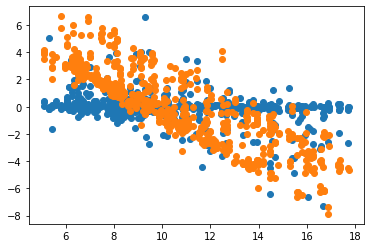

In [18]:
plt.scatter(true_DAS.values(), residuals_DAS.values())
plt.scatter(true_TP.values(), residuals_TP.values())

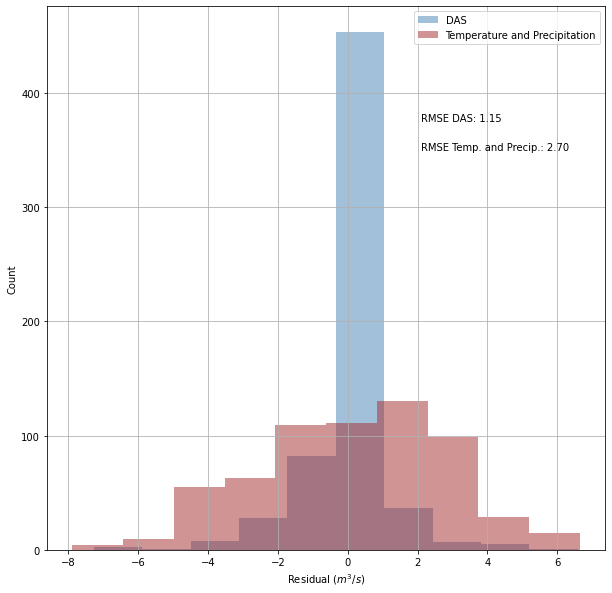

In [12]:
res_DAS = []

for i in residuals_DAS.values():
    res_DAS.append(i)
    
res_TP = []

for i in residuals_TP.values():
    res_TP.append(i)
    

fig, ax = plt.subplots(figsize=[10,10])
fig.patch.set_facecolor('white')

ax.hist(np.asarray(res_DAS).reshape(np.asarray(res_DAS).shape[0]*np.asarray(res_DAS).shape[1]), color='steelblue', alpha=0.5, label='DAS')
ax.hist(np.asarray(res_TP).reshape(np.asarray(res_DAS).shape[0]*np.asarray(res_DAS).shape[1]), color='brown', alpha=0.5, label = 'Temperature and Precipitation')
ax.grid()
ax.legend()
ax.set_xlabel('Residual $(m^3/s)$')
ax.set_ylabel('Count')
ax.annotate('RMSE DAS: '+str("%.2f" % rmse_DAS), (2.1, 375))
ax.annotate('RMSE Temp. and Precip.: '+str("%.2f" % rmse_TP), (2.1, 350))

fig.savefig('DAS_meteo_residuals_bootstrap.pdf', dpi=1200)

In [6]:
def rmse(residuals):
    return np.sqrt(((residuals) ** 2).mean())

In [7]:
rmse_DAS = rmse(np.asarray(res_DAS).reshape(np.asarray(res_DAS).shape[0]*np.asarray(res_DAS).shape[1]))
rmse_TP = rmse(np.asarray(res_TP).reshape(np.asarray(res_DAS).shape[0]*np.asarray(res_DAS).shape[1]))

In [8]:
rmse_TP

2.6954513

In [6]:
#Residuals

###DAS

predictions_DAS = lstm_model_DAS.predict(windows.test, verbose = 0).squeeze()

pred_test_dis_DAS = []

for i in predictions_DAS:
    x = (i*windows.dis_std) + windows.dis_mean #Return_sequences = True
    #x = (i*windows.dis_std) + windows.dis_mean
    pred_test_dis_DAS.append(x)
    
true_dis_DAS = []

for i in windows.test.as_numpy_iterator():
    true_dis_DAS.append(i[1])
    
true_dis_DAS = np.asarray(true_dis_DAS).squeeze()
true_dis_DAS = (true_dis_DAS*windows.dis_std)+windows.dis_mean

#true_dis_DAS = true_dis_DAS.reshape(true_dis_DAS.shape[0]*true_dis_DAS.shape[1])

residual_DAS = pred_test_dis_DAS - true_dis_DAS



#Residuals

###Temp and Precip

predictions_tp = lstm_model_tp.predict(windows.test_tp).squeeze()

pred_test_dis_tp = []

for i in predictions_tp:
    x = (i*windows.dis_std_tp) + windows.dis_mean_tp  #return_sequences = True
    #x = (i*windows.dis_std_tp) + windows.dis_mean_tp  #return_sequences = False
    pred_test_dis_tp.append(x)
    
true_dis_tp = []

for i in windows.test_tp.as_numpy_iterator():
    true_dis_tp.append(i[1])
    
true_dis_tp = np.asarray(true_dis_tp).squeeze()
true_dis_tp = (true_dis_tp*windows.dis_std_tp)+windows.dis_mean_tp

#true_dis_tp = true_dis_tp.reshape(true_dis_tp.shape[0]*true_dis_tp.shape[1])

residual_tp = pred_test_dis_tp - true_dis_tp


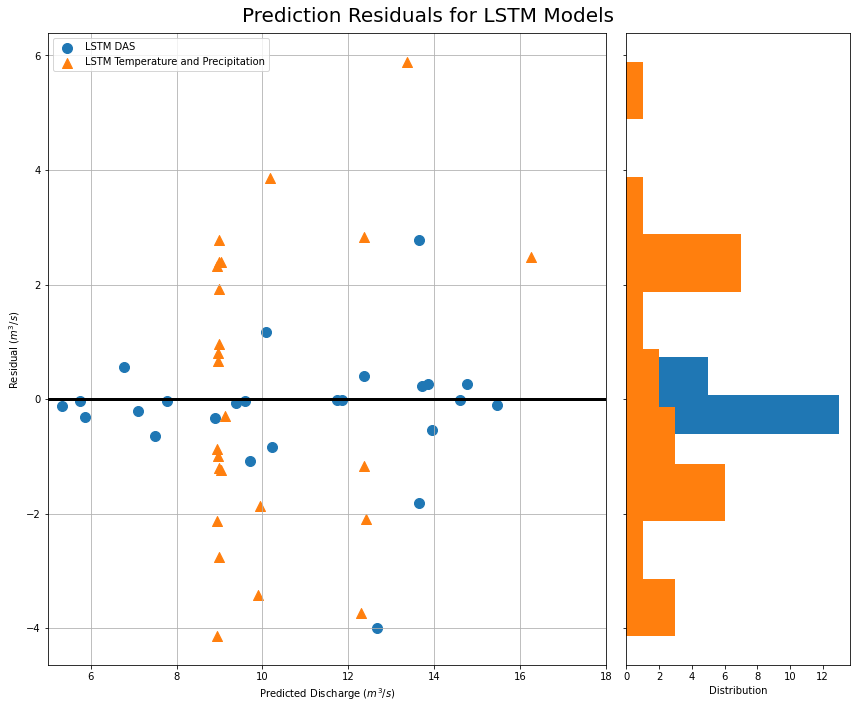

In [7]:
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,10), gridspec_kw={'width_ratios': [5, 2]}, sharey = True)
fig.patch.set_facecolor('white')

ax0.plot([5,18],[0,0], color='black', linewidth=3) #0 residual line

ax0.scatter(pred_test_dis_DAS, residual_DAS, label = 'LSTM DAS', marker='o', s=100)
ax0.scatter(pred_test_dis_tp, residual_tp, label = 'LSTM Temperature and Precipitation',  marker='^', s=100)

ax0.set_ylabel('Residual $(m^3/s)$')
ax0.set_xlabel('Predicted Discharge $(m^3/s)$')
ax0.set_xlim([5,18])
ax0.grid()
ax0.legend()

ax1.hist(residual_DAS, label = 'LSTM DAS', bins=10,orientation = 'horizontal')
ax1.hist(residual_tp, label = 'LSTM Temperature and Precipitation', bins=10,orientation = 'horizontal')
ax1.set_xlabel('Distribution')

fig.suptitle('Prediction Residuals for LSTM Models', fontsize = 20)

plt.tight_layout()
plt.show()